## Софья Скобелева
# Отток клиентов в банковской отрасли

# 1. Описание набора данных

Мы будем использовать набор данных для прогнозирования оттока клиентов в банковской отрасли. Он содержит информацию о клиентах банка, которые либо покинули банк, либо продолжают быть членами банка. Набор данных включает в себя следующие признаки:

Общие данные о клиенте:
* __CustomerId__: уникальный идентификатор для каждого клиента, целое число
* __Surname__: фамилия клиента  
* __Geography__: страна, в которой проживает клиент (Франция, Испания или Германия)  
* __Gender__: пол клиента (мужской или женский)   
* __Age__: возраст клиента, число с плавающей точкой  
* __EstimatedSalary__: предполагаемая зарплата клиента, число с плавающей точкой

Данные о клиенте, связанные с банком:
* __CreditScore__: числовое значение, представляющее кредитный рейтинг клиента, целое число  
* __Tenure__: количество лет, в течение которых клиент был в банке, целое число   
* __Balance__: баланс счета клиента, число с плавающей точкой   
* __NumOfProducts__: количество банковских продуктов, которые использует клиент (например, сберегательный счет, кредитная карта), целое число   
* __HasCrCard__: есть ли у клиента кредитная карта, бинарная переменная (1 = да, 0 = нет)   
* __IsActiveMember__: является ли клиент активным участником, бинарная переменная  (1 = да, 0 = нет)   
   
Целевая переменная: 
* __Exited__: вышел ли клиент из банка, бинарная переменная  (1 = да, 0 = нет)        

The Bank Customer Churn dataset can be found on Kaggle: https://www.kaggle.com/datasets/shubhammeshram579/bank-customer-churn-prediction/data

Мы будем исследовать отношения между переменным, отражающими различные характеристики клиента банка, и целевой переменной Exited, в которой содержится информация о том покинул клиент банк или нет. Мы хотим на основе предложенных характеристик клиента предсказать выйдет ли клиент из банка.

In [32]:
import warnings
warnings.simplefilter(action='ignore')

Импортируем необходимые нам библиотеки:

In [33]:
import pandas as pd
import numpy as np

#для визуализации
from matplotlib import pyplot as plt
import seaborn as sns

#для разделения выборки на тренировочную и тестовую
from sklearn.model_selection import train_test_split

#для масшатабирования
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

#для оценки качества модели
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix

#для построения моделей
from imblearn.over_sampling import RandomOverSampler
from sklearn import linear_model 
from sklearn import ensemble
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.utils.class_weight import compute_class_weight
import xgboost as xgb

Загрузим данные:

In [34]:
data = pd.read_csv("Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


Посмотрим какие признаки представлены в нашем датасете:

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


# 2. Разведовательный анализ данных

Оценим, насколько наши данные готовы к дальнейшему анализу. Проверим, есть ли в наших данных пропуски:

In [36]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

В столбцах `Geography`, `Age`, `HasCrCard`, `IsActiveMember` есть по одному пропуску. Заменим пропуск в столбцах `Geography`, `HasCrCard` и `IsActiveMember` на моду: для пропуска в столбце`Geography` это будет самая часто встречающаяся страна, в которой проживает клиент, для пропусков в столбцах с бинарными признаками `HasCrCard` и `IsActiveMember` - самое часто встречающееся значение (либо 1, либо 0).  

In [37]:
data['Geography'].fillna(data['Geography'].mode()[0], inplace=True)
data['HasCrCard'].fillna(data['HasCrCard'].mode()[0], inplace=True)
data['IsActiveMember'].fillna(data['IsActiveMember'].mode()[0], inplace=True)

Посмотрим на распределение признака `Age`:

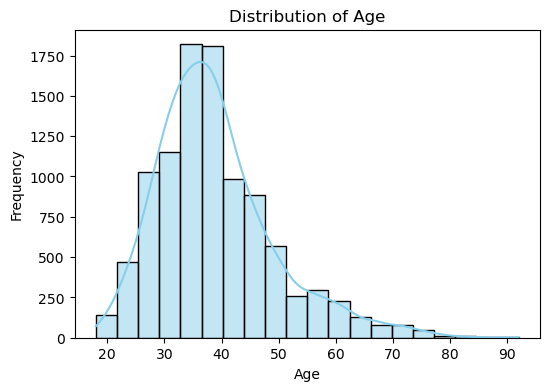

In [38]:
plt.figure(figsize=(6, 4))
sns.histplot(data=data, x='Age', bins=20, kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

In [39]:
print(f"Медиана для признака Age: {data['Age'].median()}")
print(f"Мода для признака Age: {data['Age'].mode()[0]}")

Медиана для признака Age: 37.0
Мода для признака Age: 37.0


Распределение переменной `Age` скошено влево, медиана и мода для переменной `Age` совпадают.  Заменим пропуск на моду по этому признаку:

In [40]:
data['Age'].fillna(data['Age'].mode()[0], inplace=True)

Посмотрим, много ли у нас наблюдений, в котором возраст не является целым числом:

In [41]:
# Строки, где десятичный разряд возраста не равен 0
data[data['Age'] % 1 != 0]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
18,19,15661507,Muldrow,587,Spain,Male,45.25,6,0.00,1,0.0,0.0,158684.81,0
21,22,15597945,Dellucci,636,Spain,Female,32.34,8,0.00,2,1.0,0.0,138555.46,0
26,27,15736816,Young,756,Germany,Male,36.44,2,136815.64,1,1.0,1.0,170041.95,0


В данных всего лишь три наблюдения, в котором возраст не является целым числом. Перекодируем возраст в целочисленный формат (для этих трех наблюдений возраст округлится):

In [42]:
data['Age'] = data['Age'].astype('int')

Проверим, что пропусков не осталось:

In [43]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

В данных есть столбцы, которые не несут информации для предсказания целевой переменной: `RowNumber`, `CustomerId`, `Surname`. Удалим их:

In [44]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39,1,0.00,2,0.0,0.0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1.0,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9997,709,France,Female,36,7,0.00,1,0.0,1.0,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1.0,0.0,92888.52,1
9999,772,Germany,Male,42,3,75075.31,2,1.0,0.0,92888.52,1
10000,792,France,Female,28,4,130142.79,1,1.0,0.0,38190.78,0


Выведем основные статистики для столбцов c категориальными данными:

In [45]:
data['Geography'] = data['Geography'].astype('category')
data['Gender'] = data['Gender'].astype('category')
data['NumOfProducts'] = data['NumOfProducts'].astype('category')
data['Tenure'] = data['Tenure'].astype('category')

In [46]:
data.describe(include = ['category'])

,Geography,Gender,Tenure,NumOfProducts
count,10002,10002,10002,10002
unique,3,2,11,4
top,France,Male,2,1
freq,5015,5458,1048,5085


Посмотрим как распределены эти признаки:

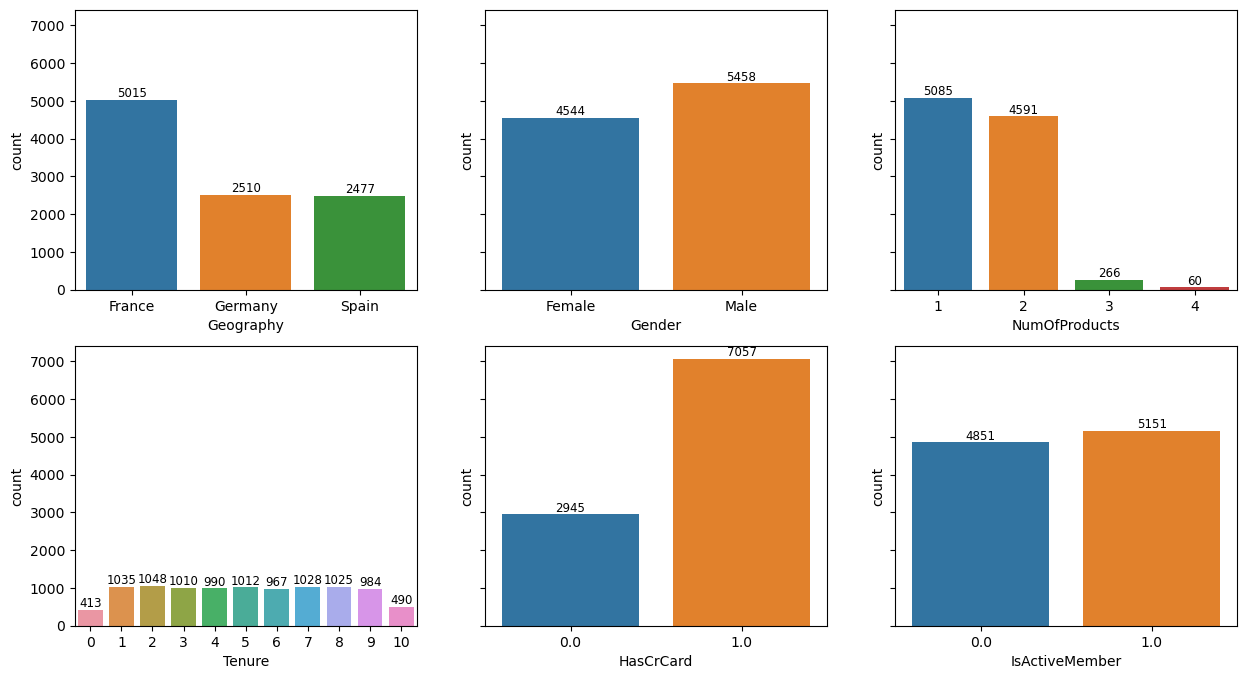

In [47]:
features = ['Geography', 'Gender', 'NumOfProducts', 'Tenure', 'HasCrCard', 'IsActiveMember']

fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharey=True)

for i in range(len(features)):
    sns.countplot(x=features[i], data=data, ax=axes[i // 3, i % 3])
    
    for p in axes[i // 3, i % 3].patches:
        axes[i // 3, i % 3].annotate(f'{round(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                                     ha='center', va='bottom', fontsize=8.5)

plt.show()

* __Geography__: В данных содержится информация о клиентах банков из Франции, Испании и Германии. Больше всего клиентов из Франции - примерно столько же сколько клиентов из Гермаии и Испании вместе взятых, наблюдается перекос в данных.   

* __Gender__: По полу наблюдения более сбалансированны, мужчин больше чем женщин примерно на 20%.  

* __NumOfProducts__: Больше всего клиентов пользуются 1 или 2 продуктами банка, клиентов, которые используют 3 продукта намного меньше (примерно в 17 и 19 раз меньше по сравнению с 1 и 2 продуктами соответственно), клиентов, которые используют 4 продукта еще меньше (примерно в 77 и 85 раз меньше по сравнению с 1 и 2 продуктами соответственно).

* __Tenure__: клиентов, которые были членами банка 1-9 лет примерно одинаковое количество - около 1000, больше всего клиентов, которые были членами банка 2 года. Выбиваются клиенты, которые были членами банка 0 лет или 10 лет - их на порядок меньше (413 и 490 соответственно).

* __HasCrCard__: примерно 70.57% клиентов имеют кредитную карту, по этому признаку данные несбалансированы.

* __IsActiveMember__: примерно 51.51% клиентов являются активными участниками, по этому признаку данные сбалансированы.

Выведем основные статистики для числовых столбцов:

In [48]:
stats = data.describe()
stats.round(2) # Округлим значения описательной статистики до 2 знаков после запятой

,CreditScore,Age,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.00,10002.00,10002.00,10002.00,10002.00,10002.00,10002.0
mean,650.56,38.92,76491.11,0.71,0.51,100083.33,0.2
std,96.66,10.49,62393.47,0.46,0.50,57508.12,0.4
min,350.00,18.00,0.00,0.00,0.00,11.58,0.0
25%,584.00,32.00,0.00,0.00,0.00,50983.75,0.0
50%,652.00,37.00,97198.54,1.00,1.00,100185.24,0.0
75%,718.00,44.00,127647.84,1.00,1.00,149383.65,0.0
max,850.00,92.00,250898.09,1.00,1.00,199992.48,1.0


* __CreditScore__: кредитный рейтинг клиентов в среднем составляет примерно 651 и варьируется от 350 до 850. 25% клиентов в выборке имеют рейтинг до 584, 50% - до 652, 75% - до 718.
  
* __Age__: средний возраст клиентов банка - около 39 лет, то есть в выборке преобладают клиенты среднего возраста. Минимальный возраст - 18 лет, максимальный - 92 года, диапазон возрастов в выборке широкий. 25% клиентов в выборке имеют возраст до 32 лет, 50% - до 37 лет, 75% - до 44 лет.

* __Balance__: средний баланс счета клиентов составляет около 76 491 евро, минимальный баланс - 0 евро, максимальный - примерно 250 898 евро. 50% лиентов в выборке имеют баланс - до 97 199 евро, 75% - до 12 7648 евро. 

* __EstimatedSalary__: средняя предполагаемая зарплата клиента составляет примерно 100 083 евро, минимальная - примерно 12 евро, максимальная - примерно 199 993 евро. 25% клиентов в выборке имеют предполагаемую зарплату до 50 984 евро, 50% - до 100 185 евро, 75% - до 149 383 евро.

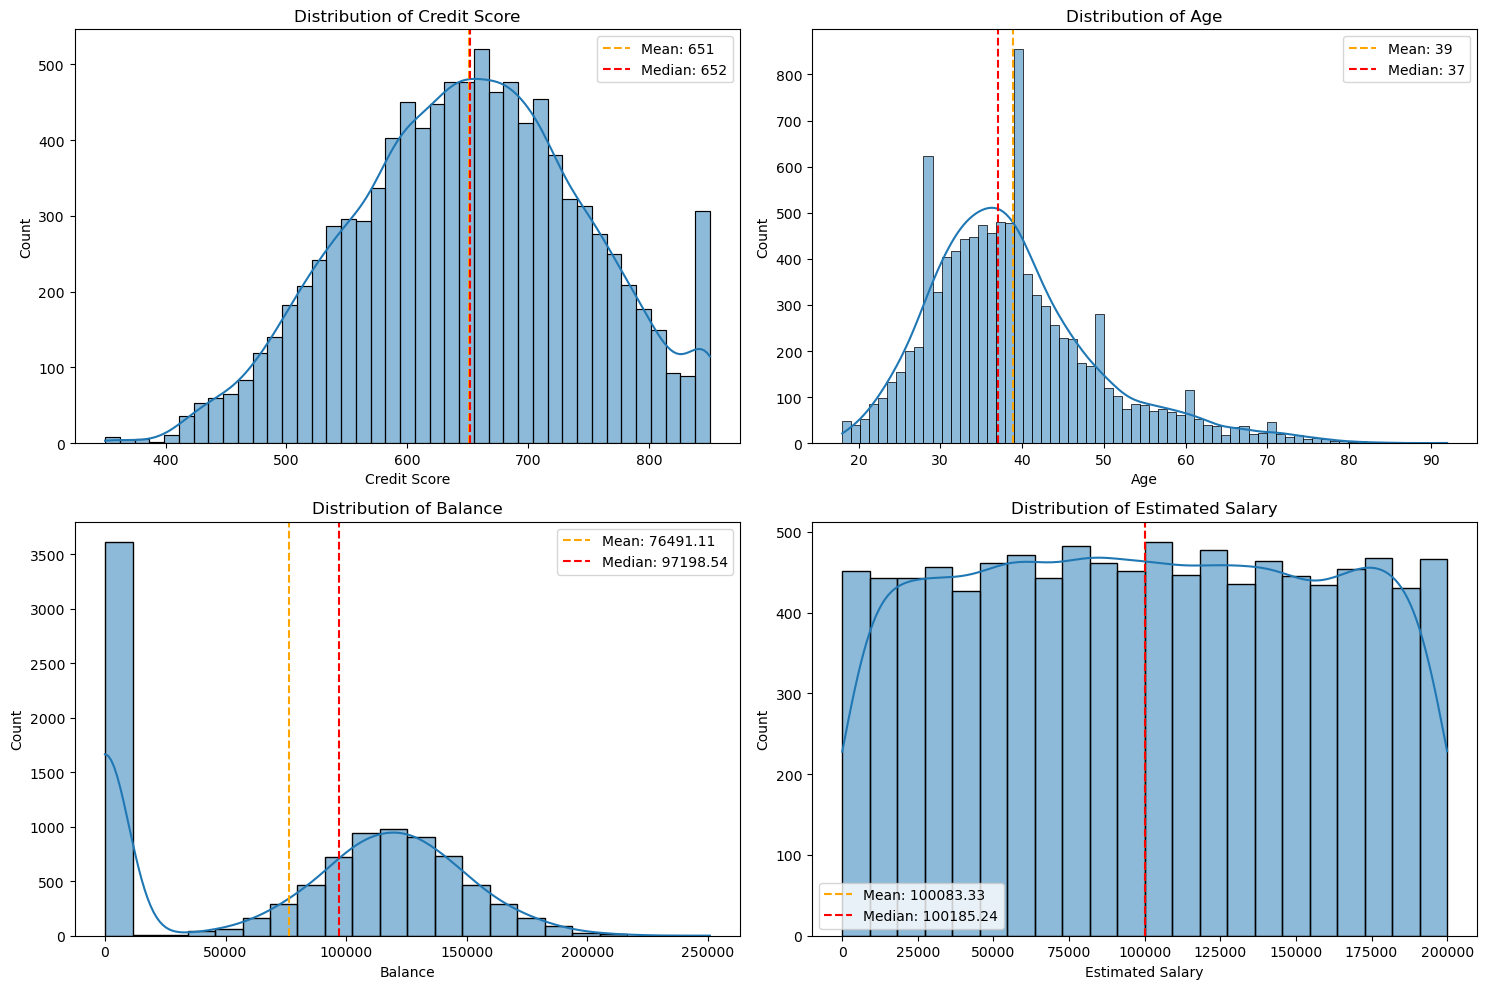

In [49]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(data['CreditScore'], kde=True, ax=axes[0, 0])
mean = data['CreditScore'].mean()
median = data['CreditScore'].median()
axes[0, 0].axvline(mean, color='orange', linestyle='--', label=f'Mean: {mean:.0f}')
axes[0, 0].axvline(median, color='red', linestyle='--', label=f'Median: {median:.0f}')
axes[0, 0].legend()
axes[0, 0].set_title('Distribution of Credit Score')
axes[0, 0].set_xlabel('Credit Score')

sns.histplot(data['Age'], kde=True, ax=axes[0, 1])
mean = data['Age'].mean()
median = data['Age'].median()
axes[0, 1].axvline(mean, color='orange', linestyle='--', label=f'Mean: {mean:.0f}')
axes[0, 1].axvline(median, color='red', linestyle='--', label=f'Median: {median:.0f}')
axes[0, 1].legend()
axes[0, 1].set_title('Distribution of Age')
axes[0, 1].set_xlabel('Age')

sns.histplot(data['Balance'], kde=True, ax=axes[1, 0])
mean = data['Balance'].mean()
median = data['Balance'].median()
axes[1, 0].axvline(mean, color='orange', linestyle='--', label=f'Mean: {mean:.2f}')
axes[1, 0].axvline(median, color='red', linestyle='--', label=f'Median: {median:.2f}')
axes[1, 0].legend()
axes[1, 0].set_title('Distribution of Balance')
axes[1, 0].set_xlabel('Balance')

sns.histplot(data['EstimatedSalary'], kde=True, ax=axes[1, 1])
mean = data['EstimatedSalary'].mean()
median = data['EstimatedSalary'].median()
axes[1, 1].axvline(mean, color='orange', linestyle='--', label=f'Mean: {mean:.2f}')
axes[1, 1].axvline(median, color='red', linestyle='--', label=f'Median: {median:.2f}')
axes[1, 1].legend()
axes[1, 1].set_title('Distribution of Estimated Salary')
axes[1, 1].set_xlabel('Estimated Salary')

plt.tight_layout()
plt.show()

Посмотрим на распределение целевой переменной и проверим есть ли несбалансированность классов:

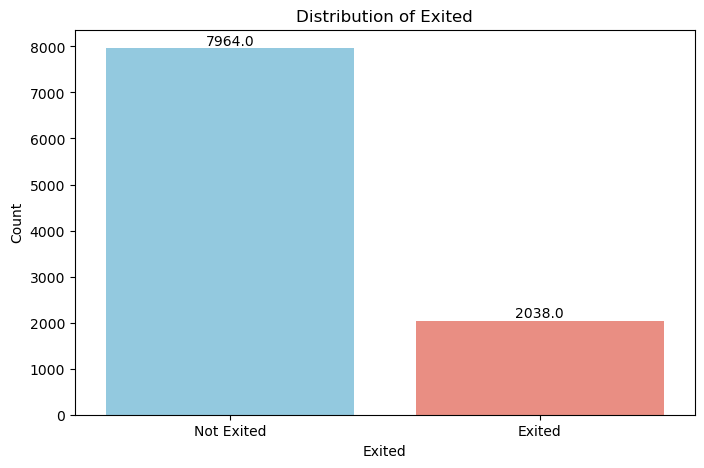

In [50]:
plt.figure(figsize=(8, 5))
bar_plot = sns.countplot(x='Exited', data=data, palette=['skyblue', 'salmon'])

for i in bar_plot.patches:
    bar_plot.text(i.get_x() + i.get_width() / 2, 
                  i.get_height() + 0.5, 
                  str(i.get_height()), 
                  ha='center', 
                  va='bottom')

plt.xticks([0, 1], labels=['Not Exited', 'Exited'])
plt.xlabel('Exited')
plt.ylabel('Count')
plt.title('Distribution of Exited')
plt.show()

Видна сильная несбалансированность классов: клиентов, переставших быть членами банка почти в 4 раза больше по сравнению с клиенами, оставшимися в банке. Модель может быть склонна к предсказанию класса клиентов, который встречается чаще (клиенты, переставшие быть членами банка).    

Мы будем использовать модели, устойчивые несбалансированным классам, например, ансамблевые модели (случаный лес и градиентный бустинг) за счет комбинации прогнозов нескольких моделей могут улучшить результаты на несбалансированных данных.

При оценке моделей нельзя будет использовать accuracy (значение accuracy может быть высоким просто за счет предсказания наиболее часто встречающегося класса), но можно будет рассмотреть precision (отражает способность модели обнаружить все реальные положительные случаи ),f-score и recall (отражают количество верно предсказанных значений для каждого класса).   

Посмотрим, есть ли в наших данных выбросы:

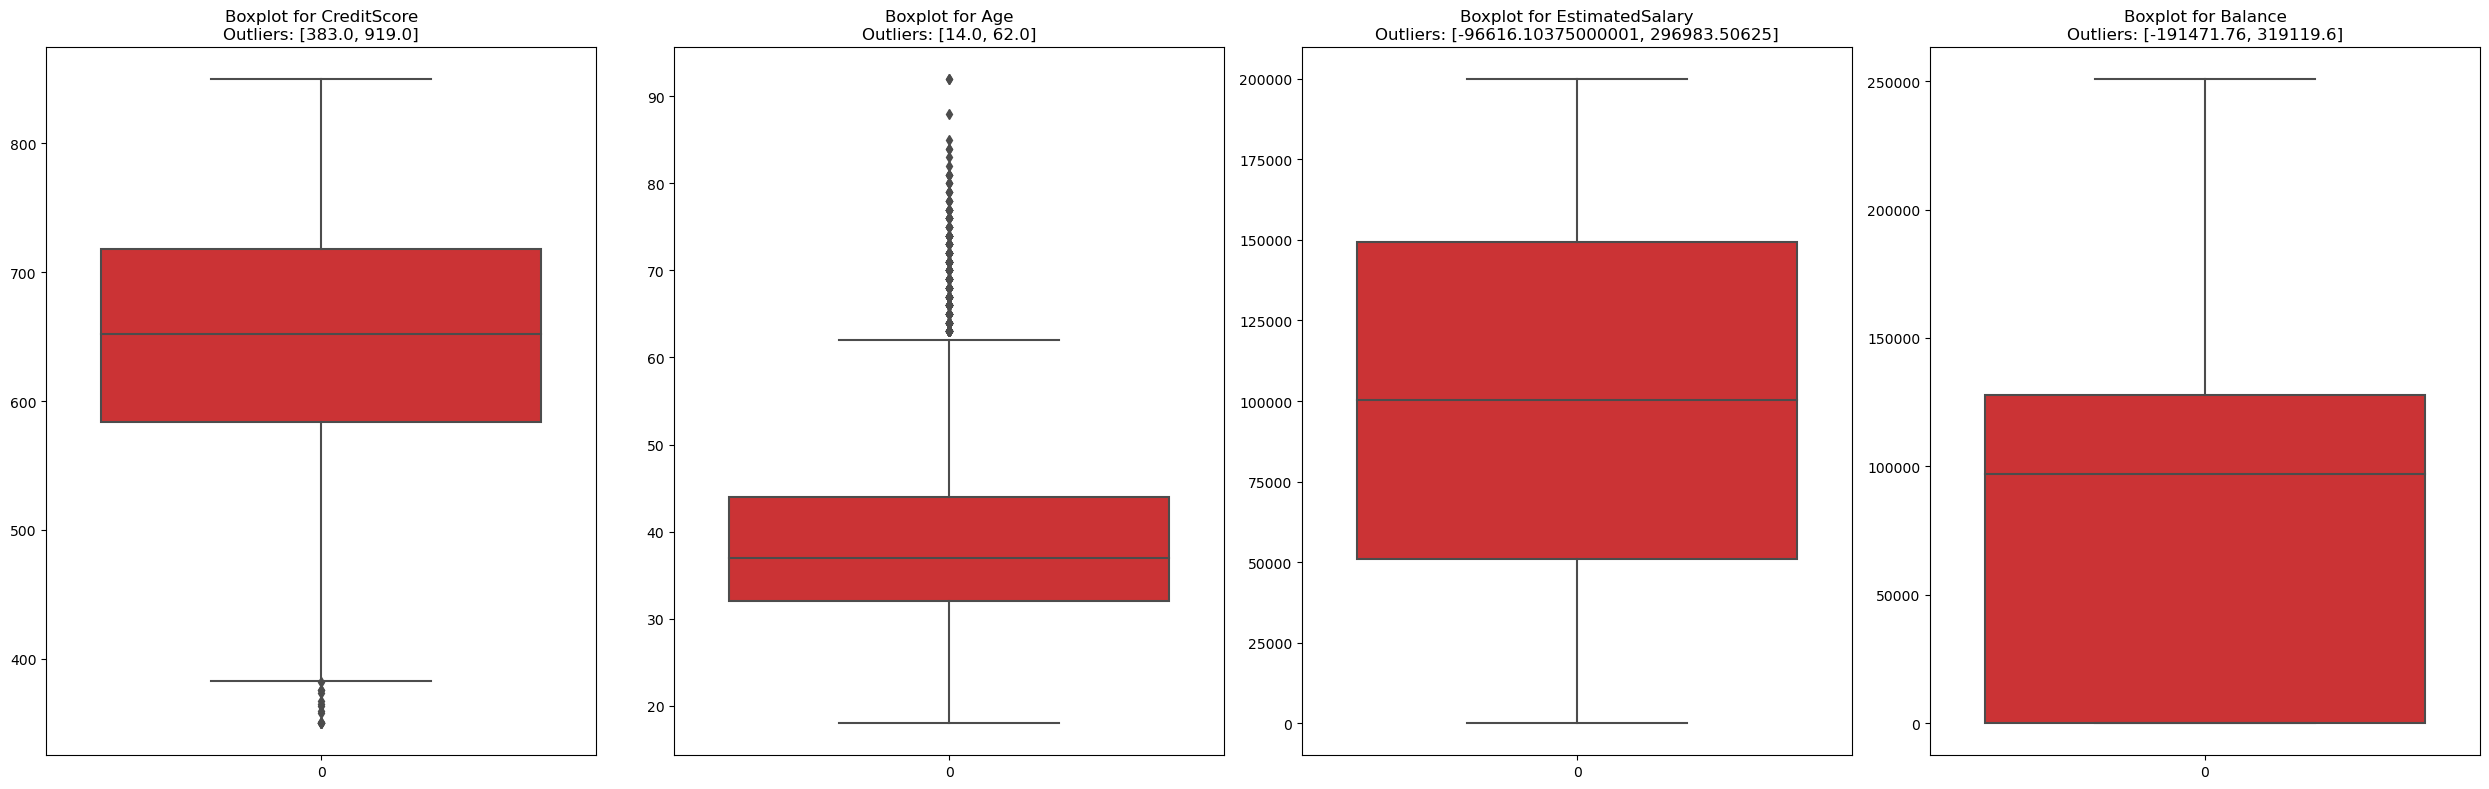

In [51]:
fig, axes = plt.subplots(1, 4, figsize=(25, 8))

# Функция для определения границ выбросов
def detect_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

outliers = {}
for i, col in enumerate(['CreditScore', 'Age', 'EstimatedSalary', 'Balance']):
    lower_bound, upper_bound = detect_outliers(data[col].values)
    outliers[col] = (lower_bound, upper_bound)
    sns.boxplot(data=data[col], ax=axes[i], palette='Set1')
    axes[i].set_title('Boxplot for ' + col + '\n' + f'Outliers: [{lower_bound}, {upper_bound}]')

plt.tight_layout()
plt.show()

Среди наблюдений по признакам `CreditScore`, `Age`, `NumOfProducts` есть выбросы. Определим количество выбросов:

In [52]:
print(f"Количество нетипичных значений для CreditScore: {len(data[data['CreditScore'] < 383])}")
print(f"Количество нетипичных значений для Age: {len(data[data['Age'] > 62])}")
print(f"Количество нетипичных значений для EstimatedSalary: {len(data[data['EstimatedSalary'] > 296983.50652])}")
print(f"Количество нетипичных значений для Balance: {len(data[data['Balance'] > 319119.6])}")

Количество нетипичных значений для CreditScore: 15
Количество нетипичных значений для Age: 359
Количество нетипичных значений для EstimatedSalary: 0
Количество нетипичных значений для Balance: 0


Посмотрим сколько в наших данных выбросов для признаков `CreditScore` и `Age` по правилу трех сигм (среднее +- 3 стандартных отклонения):

In [53]:
mean = data['CreditScore'].mean()
std = data['CreditScore'].std()

lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

credit_score_outliers = data[(data['CreditScore'] < lower_bound) | (data['CreditScore'] > upper_bound)].index

print(f"Количество нетипичных значений для CreditScore: {len(credit_score_outliers)}")

Количество нетипичных значений для CreditScore: 8


In [54]:
mean = data['Age'].mean()
std = data['Age'].std()

lower_bound = mean - 3 * std
upper_bound = mean + 3 * std

age_outliers = data[(data['Age'] < lower_bound) | (data['Age'] > upper_bound)].index

print(f"Количество нетипичных значений для Age: {len(age_outliers)}")

Количество нетипичных значений для Age: 133


In [55]:
upper_bound

70.38215038586358

Выбросов для признака `Age` оказалось достаточно много, не будем удалять их, чтобы не терять информацию (я провела анализ с удалением этих выбросов, результат значимо не улучшился). Удалим выбросы для признака `CreditScore`:

In [56]:
data = data.drop(credit_score_outliers)

## Модели, которые мы будем обучать

Мы будем решать задачу бинарной классификации - предсказывать выйдет клиент из банка или нет. Для предсказания нашей целевой переменной можно использовать следующие модели:

1) __Логистическая регрессия.__ Логистическая регрессия позволяет выделить характерные для класса признаки и определить вклад каждого признака.  

2)  __Случайный лес.__ Случайный лес является одним из самых эффективных алгоритмов, дает высокую точность предсказания. Позволяет оценить значимость отдельных признаков (можно понять, какие признаки наиболее важные (те, которые в корне важнее), однако нельзя сказать во сколько раз один признак важнее другого). Этот алгоритм более устойчив к несбалансированности классов целевой переменной и к наличию выбросов.  

3)  __KNN (метод k-ближайших соседей).__  Основан на рассчете расстояний: решение о классификации объекта принимается на основе его ближайших соседей.

4) __Градиентный бустинг.__ Позволит улучшить качество модели: модели обучаются, последовательно уточняя друг друга, смещение должно снижаться. Так мы можем меньшим количеством моделей добиться лучшего качества. Также более устойчив к выбросам.

## Исследование отношений независимых переменных и целевой переменной  

Выведем корреляционную матрицу. Посмотрим, какие переменные сильнее всего коррелируют с нашей целевой переменной, а также проверим признаки на наличие мультиколлинеарности:

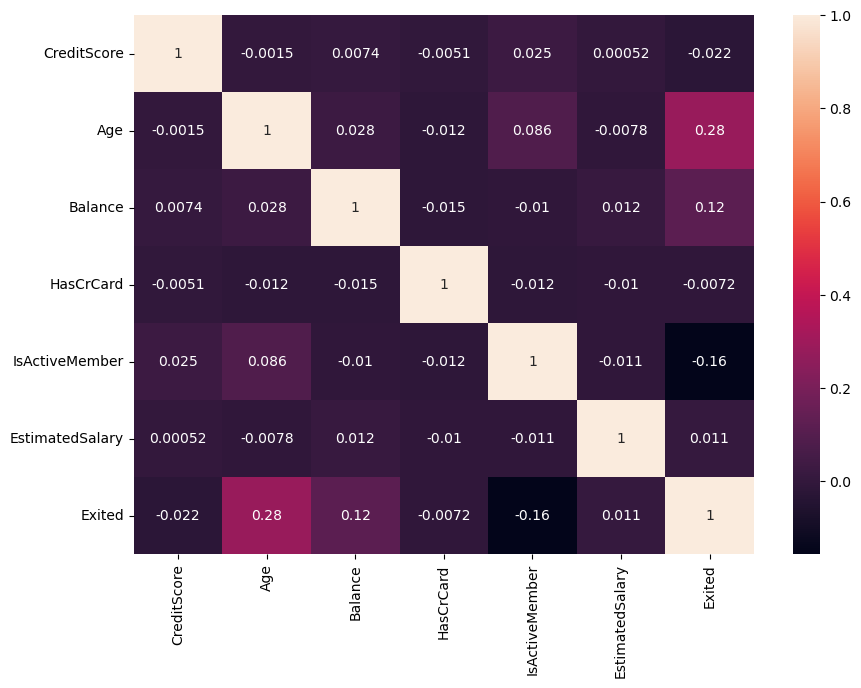

In [57]:
plt.figure(figsize = (10, 7))
sns.heatmap(data.select_dtypes('number').corr(), annot = True);

In [58]:
sorted_correlation = data.corr(numeric_only = True)['Exited'].abs().round(2).sort_values(ascending=False)
print(sorted_correlation.head(4)) 

Exited            1.00
Age               0.28
IsActiveMember    0.16
Balance           0.12
Name: Exited, dtype: float64


Мультиколлинеарности нет. Наибольшую корреляцию с целевой переменной среди числовых признаков показывают признаки `Age` (0,29), `IsActiveMember` (-0,16) и `Balance` (0,12). 

Положительная коррреляция `Age` и `Exited` и  свидетельствует о том, что с увеличением возраста клиенты более склонны уходить из банка.

Отрицательная (но не такая высокая) коррреляция `IsActiveMember` и `Exited` свидетельствует о том, что с уменьшением активности у клиентов незначительно увеличивается вероятность их ухода из компании.

Положительная (но не такая высокая) коррреляция `Balance` и `Exited` свидетельствует о том, что клиенты с более высоким балансом имеют незначительно более низкую вероятность ухода из банка. 

Посмотрим на связь переменной `Age` и целевой переменной `Exited` и переменной `Balance` и целевой переменной `Exited`:

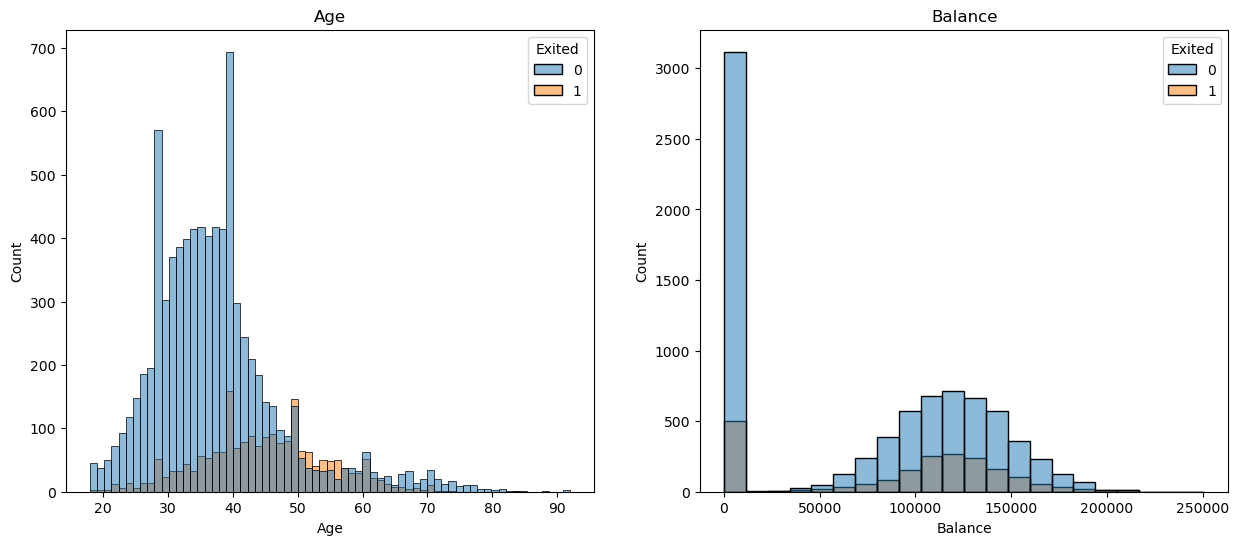

In [59]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(data, x='Age', hue='Exited')
plt.title('Age')

plt.subplot(1, 2, 2)
sns.histplot(data, x='Balance', hue='Exited')
plt.title('Balance')

plt.show()

Среди клиентов в возрасте примерно 18-45 лет намного больше тех, кто остается клиентом банка.

Посмотрим на связь категориальных переменных и целевой переменной `Exited`:

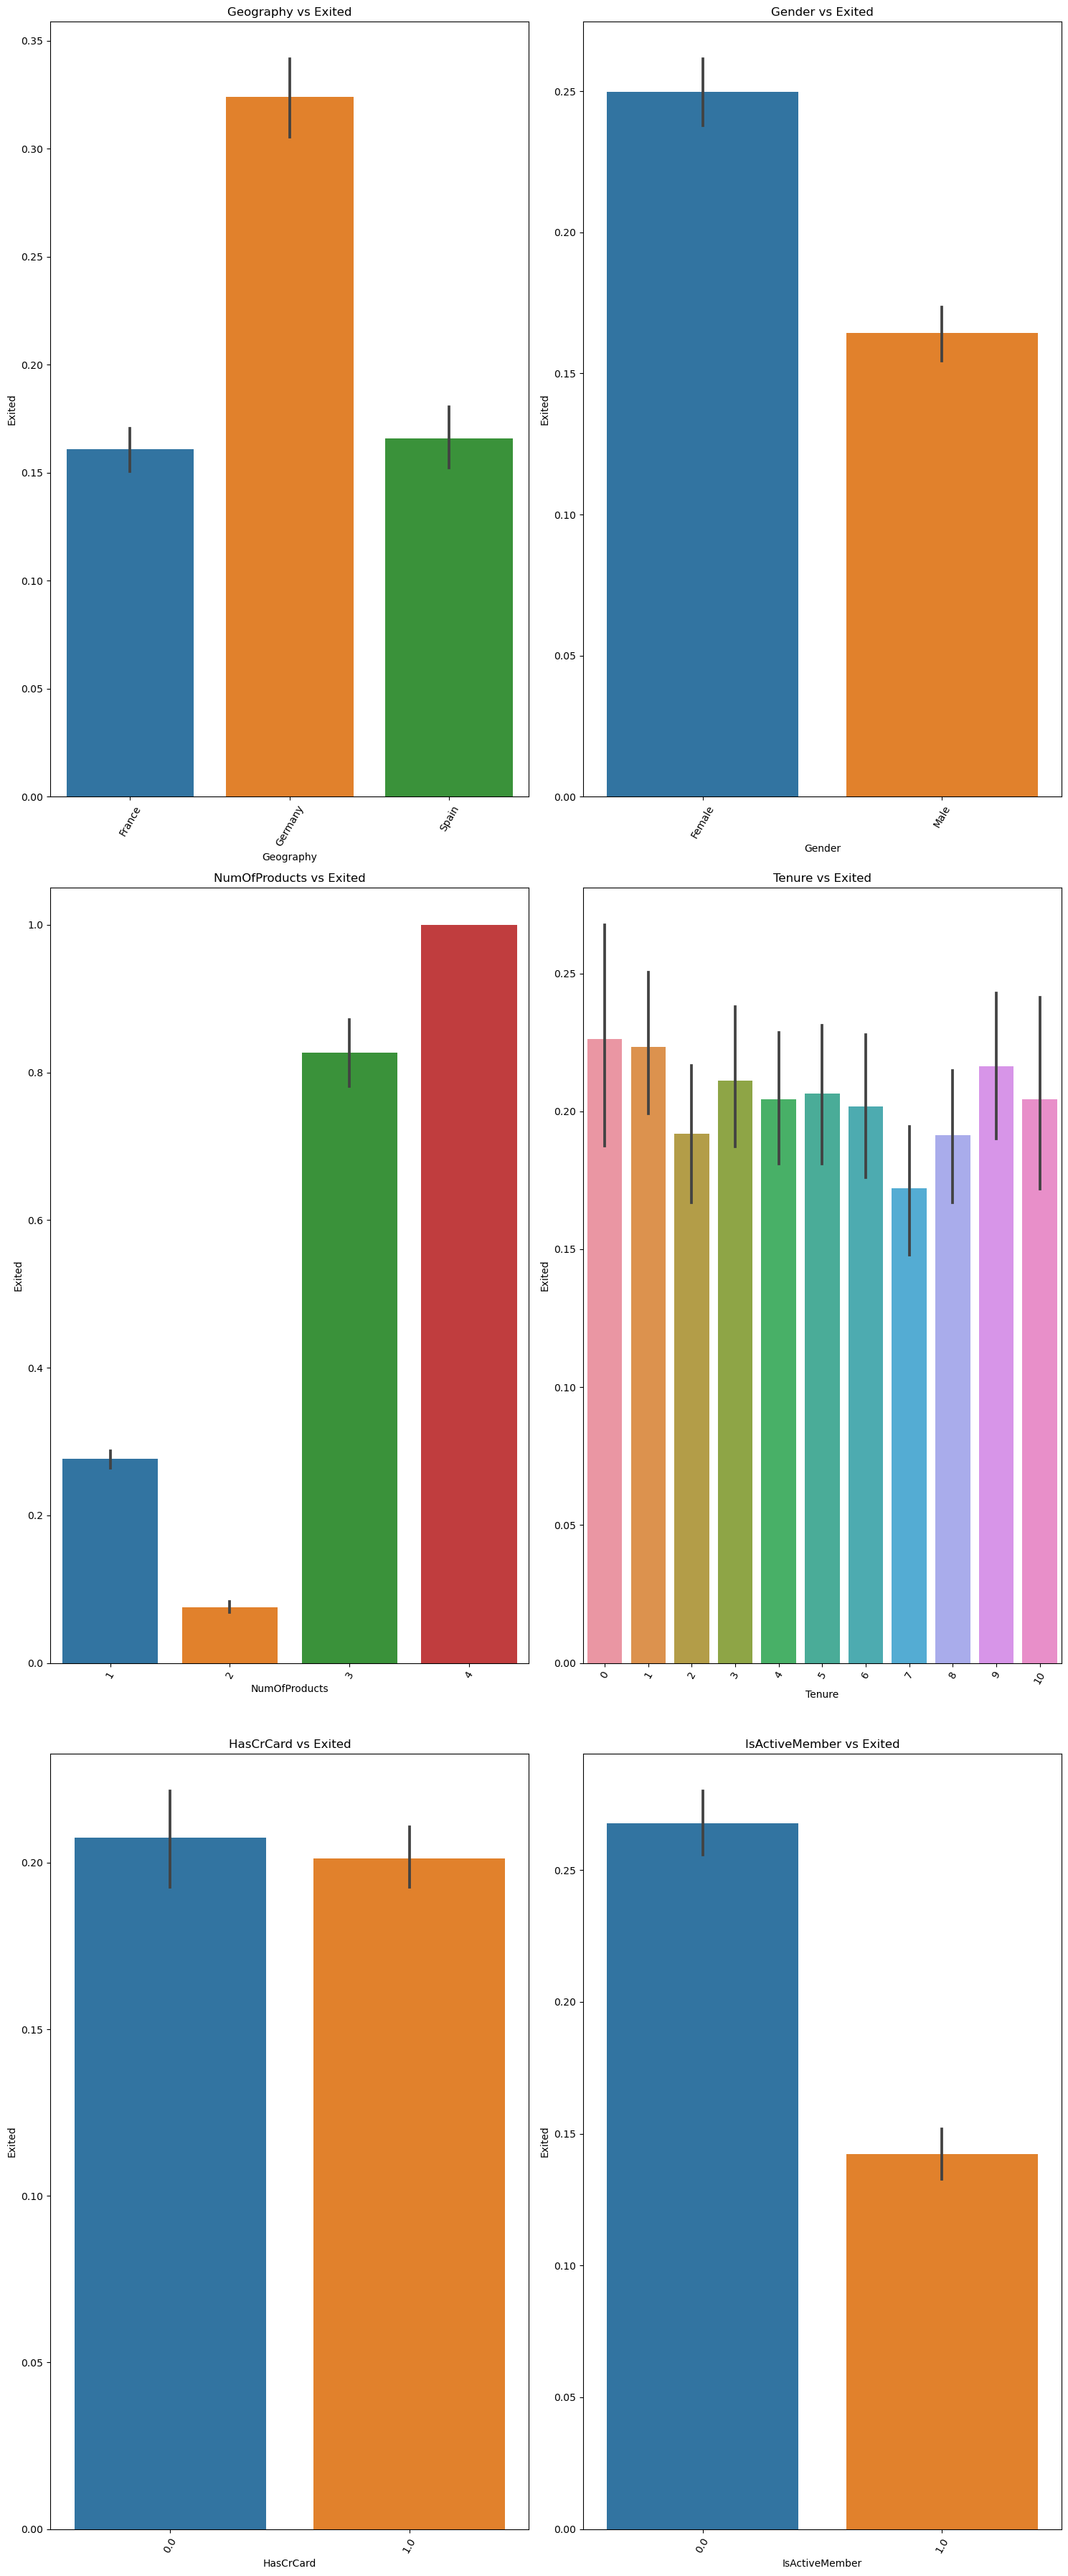

In [60]:
n = len(features) # число категориальных признаков
fig, axes = plt.subplots(n//2 + n%2, 2, figsize=(15, 6*n)) # фигура с n//2+1 строк и 2 столбцами

# Создаем цикл для всех признаков из списка категориальных признаков
for i, feature in enumerate(features):
    row = i // 2
    col = i % 2
    # Строим столбчатую диаграмму доли клиентов, ушедших из банка (Exited=1) в зависимости от категории
    mean_barplot = sns.barplot(data=data, x=feature, y='Exited', ax=axes[row, col])
    mean_barplot.set_ylabel('Exited')
    mean_barplot.set_title(f'{feature} vs Exited')
    mean_barplot.xaxis.set_tick_params(rotation=60)

plt.tight_layout() # выравнивание графиков
plt.show()

* Больше всего клиентов, которые ушли из банка, проживают в Германии.    
* Среди клиентов, которые ушли из банка, больше женщин.  
* Все клиенты, которые пользовались 4 продуктами, и почти все, которые пользовались 3 продуктами, ушли из банка.  
* Среди клиентов, которые ушли из банка, больше всего тех, которые были членами банка меньше одного года.  
* Примерно одинаковое число клиентов, у которых есть кредитнная карта, покинуло банк.  
* Среди клиентов, которые ушли из банка, больше тех, которые не являются активными членами.  

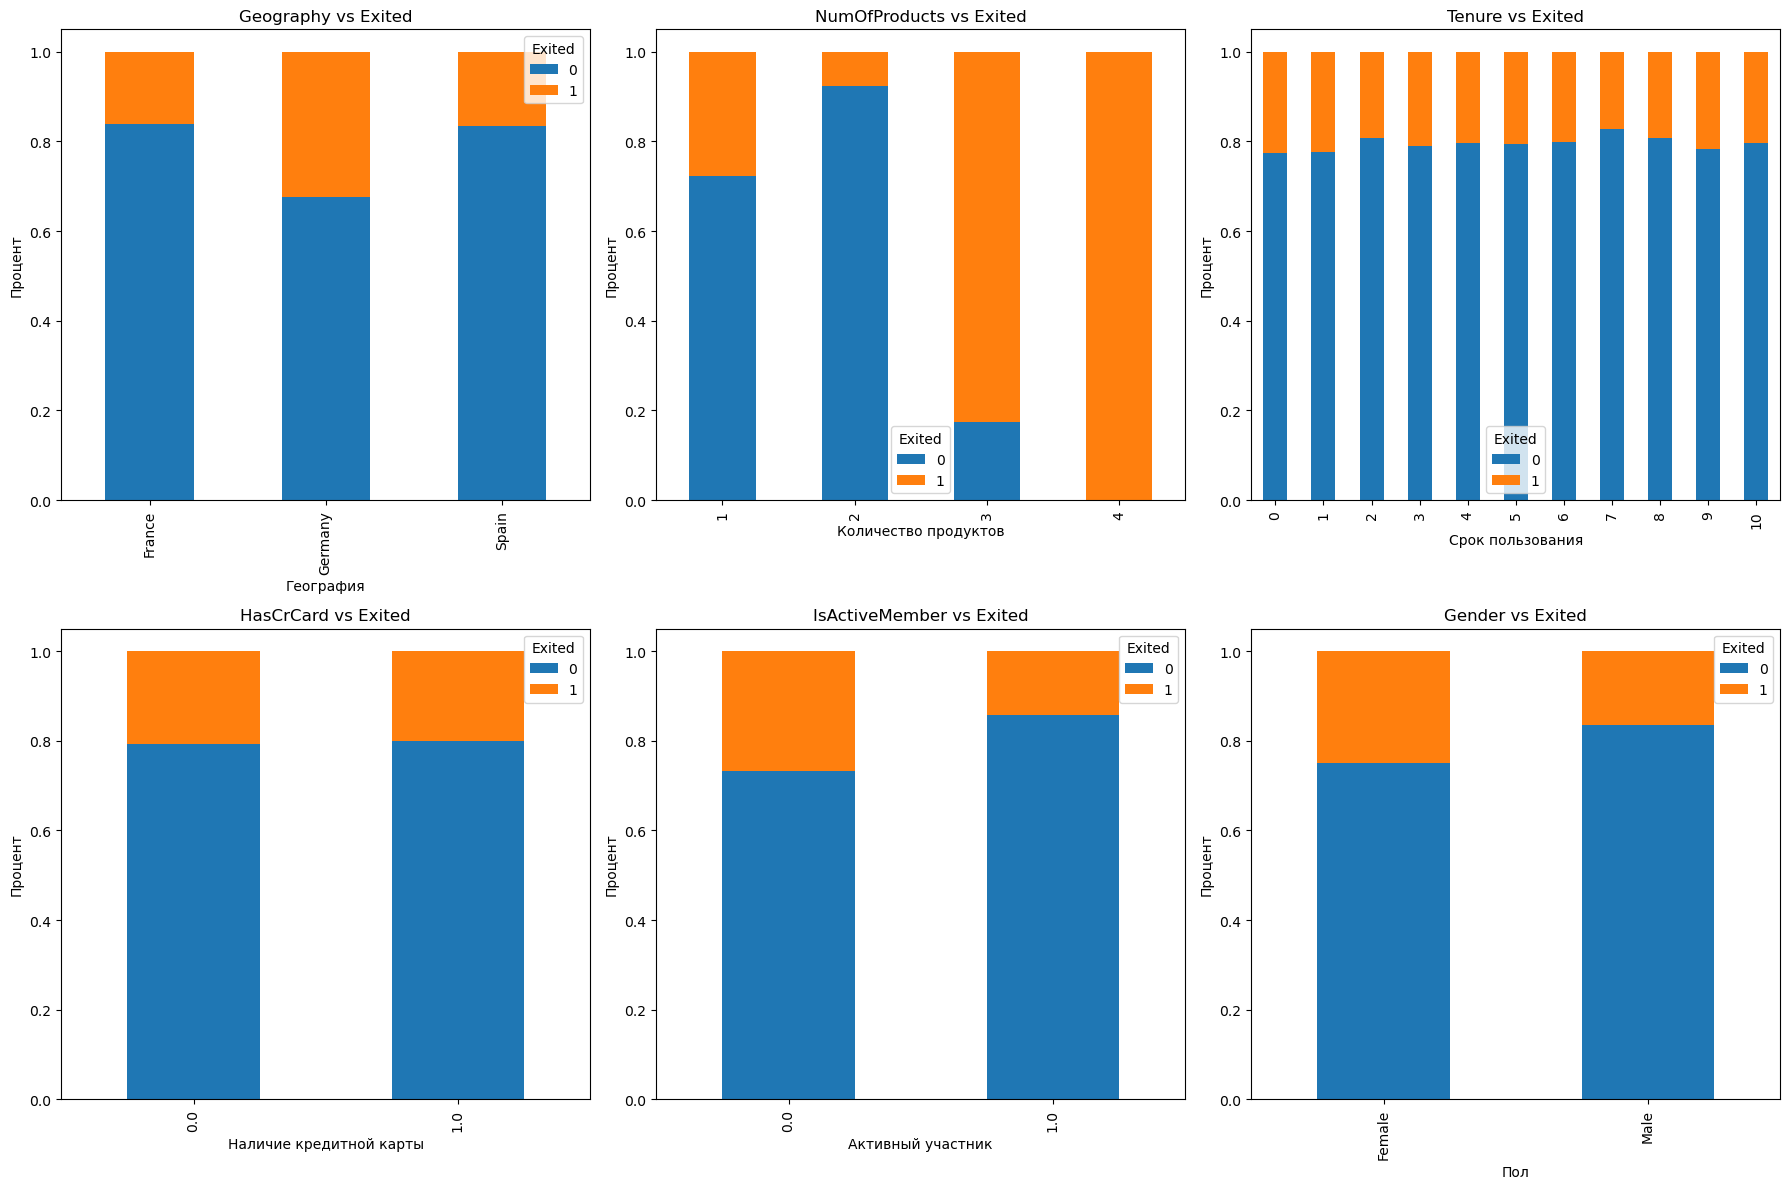

In [61]:
exit_by_geo = data.groupby('Geography')['Exited'].value_counts(normalize=True).unstack()
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

exit_by_geo.plot(kind='bar', stacked=True, ax=axes[0, 0])
axes[0, 0].set_title('Geography vs Exited')
axes[0, 0].set_xlabel('География')
axes[0, 0].set_ylabel('Процент')

exit_by_products = data.groupby('NumOfProducts')['Exited'].value_counts(normalize=True).unstack()
exit_by_products.plot(kind='bar', stacked=True, ax=axes[0, 1])
axes[0, 1].set_title('NumOfProducts vs Exited')
axes[0, 1].set_xlabel('Количество продуктов')
axes[0, 1].set_ylabel('Процент')

exit_by_tenure = data.groupby('Tenure')['Exited'].value_counts(normalize=True).unstack()
exit_by_tenure.plot(kind='bar', stacked=True, ax=axes[0, 2])
axes[0, 2].set_title('Tenure vs Exited')
axes[0, 2].set_xlabel('Срок пользования')
axes[0, 2].set_ylabel('Процент')

exit_by_card = data.groupby('HasCrCard')['Exited'].value_counts(normalize=True).unstack()
exit_by_card.plot(kind='bar', stacked=True, ax=axes[1, 0])
axes[1, 0].set_title('HasCrCard vs Exited')
axes[1, 0].set_xlabel('Наличие кредитной карты')
axes[1, 0].set_ylabel('Процент')

exit_by_active = data.groupby('IsActiveMember')['Exited'].value_counts(normalize=True).unstack()
exit_by_active.plot(kind='bar', stacked=True, ax=axes[1, 1])
axes[1, 1].set_title('IsActiveMember vs Exited')
axes[1, 1].set_xlabel('Активный участник')
axes[1, 1].set_ylabel('Процент')

exit_by_gender = data.groupby('Gender')['Exited'].value_counts(normalize=True).unstack()
exit_by_gender.plot(kind='bar', stacked=True, ax=axes[1, 2])
axes[1, 2].set_title('Gender vs Exited')
axes[1, 2].set_xlabel('Пол')
axes[1, 2].set_ylabel('Процент')

plt.tight_layout()
plt.show()

Построим boxplot для признаков в зависимости от целевой переменной `Exited` (для признаков, для которых это релевантно: `CreditScore`, `Age`, `Balance`, `EstimatedSalary`)

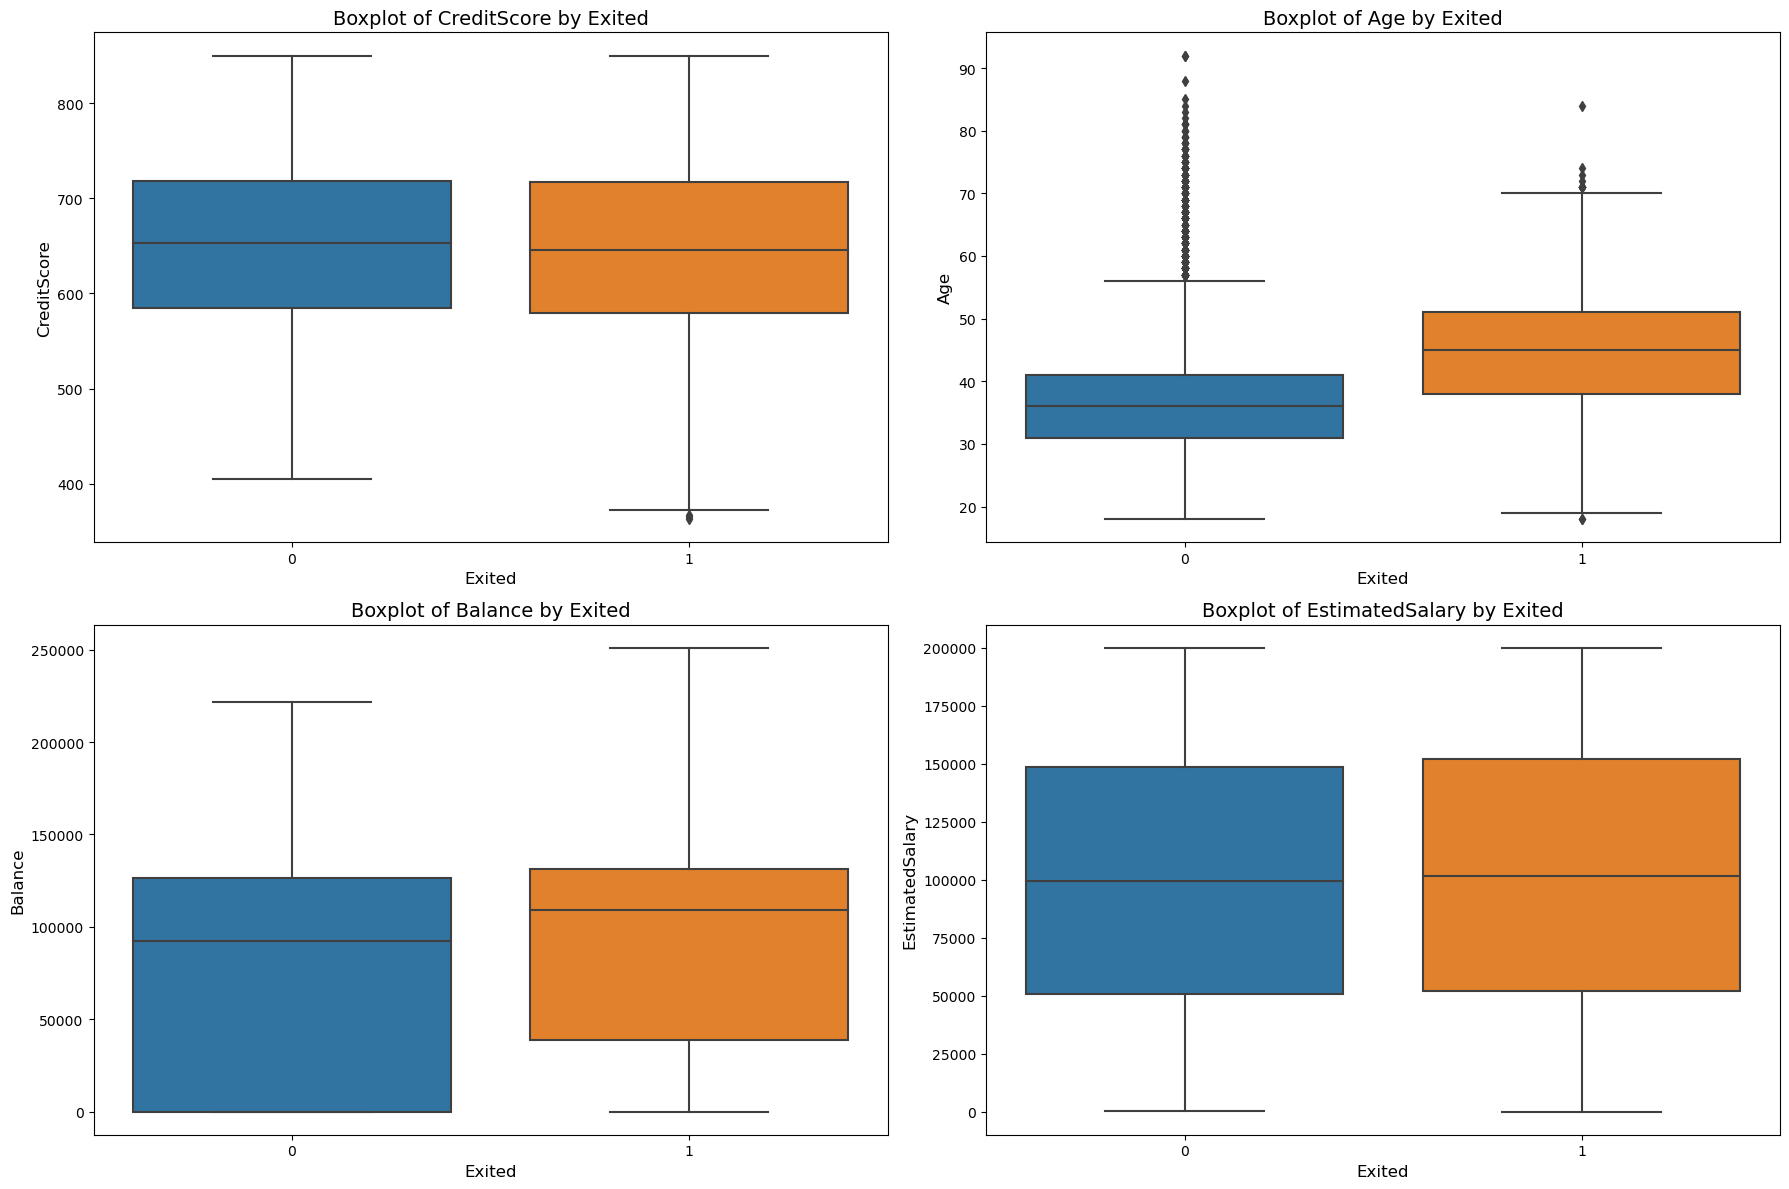

In [62]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))

sns.boxplot(x='Exited', y='CreditScore', data=data, ax=axes[0, 0])
axes[0, 0].set_xlabel('Exited', fontsize=12)
axes[0, 0].set_ylabel('CreditScore', fontsize=12)
axes[0, 0].set_title('Boxplot of CreditScore by Exited', fontsize=14)

sns.boxplot(x='Exited', y='Age', data=data, ax=axes[0, 1])
axes[0, 1].set_xlabel('Exited', fontsize=12)
axes[0, 1].set_ylabel('Age', fontsize=12)
axes[0, 1].set_title('Boxplot of Age by Exited', fontsize=14)

sns.boxplot(x='Exited', y='Balance', data=data, ax=axes[1, 0])
axes[1, 0].set_xlabel('Exited', fontsize=12)
axes[1, 0].set_ylabel('Balance', fontsize=12)
axes[1, 0].set_title('Boxplot of Balance by Exited', fontsize=14)

sns.boxplot(x='Exited', y='EstimatedSalary', data=data, ax=axes[1, 1])
axes[1, 1].set_xlabel('Exited', fontsize=12)
axes[1, 1].set_ylabel('EstimatedSalary', fontsize=12)
axes[1, 1].set_title('Boxplot of EstimatedSalary by Exited', fontsize=14)

plt.tight_layout()
plt.show()

Посмотрим на взаимосвязь признаков, показавших наибольшую корреляцию с целевым признаком (`Age`, `Balance`) и целевого признака `Exited`:

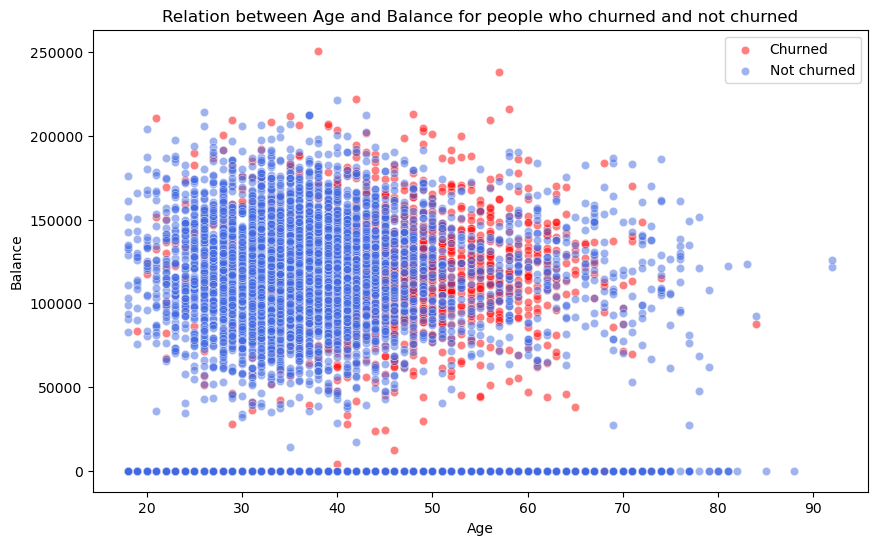

In [63]:
plt.figure(figsize=(10, 6))

churned_data = data[data['Exited'] == 1]
sns.scatterplot(x='Age', y='Balance', data=churned_data, color='red', alpha=0.5, label='Churned')

unChurned_data = data[data['Exited'] == 0]
sns.scatterplot(x='Age', y='Balance', data=unChurned_data, color='royalblue', alpha=0.5, label='Not churned')

plt.title('Relation between Age and Balance for people who churned and not churned')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.legend()

plt.show()

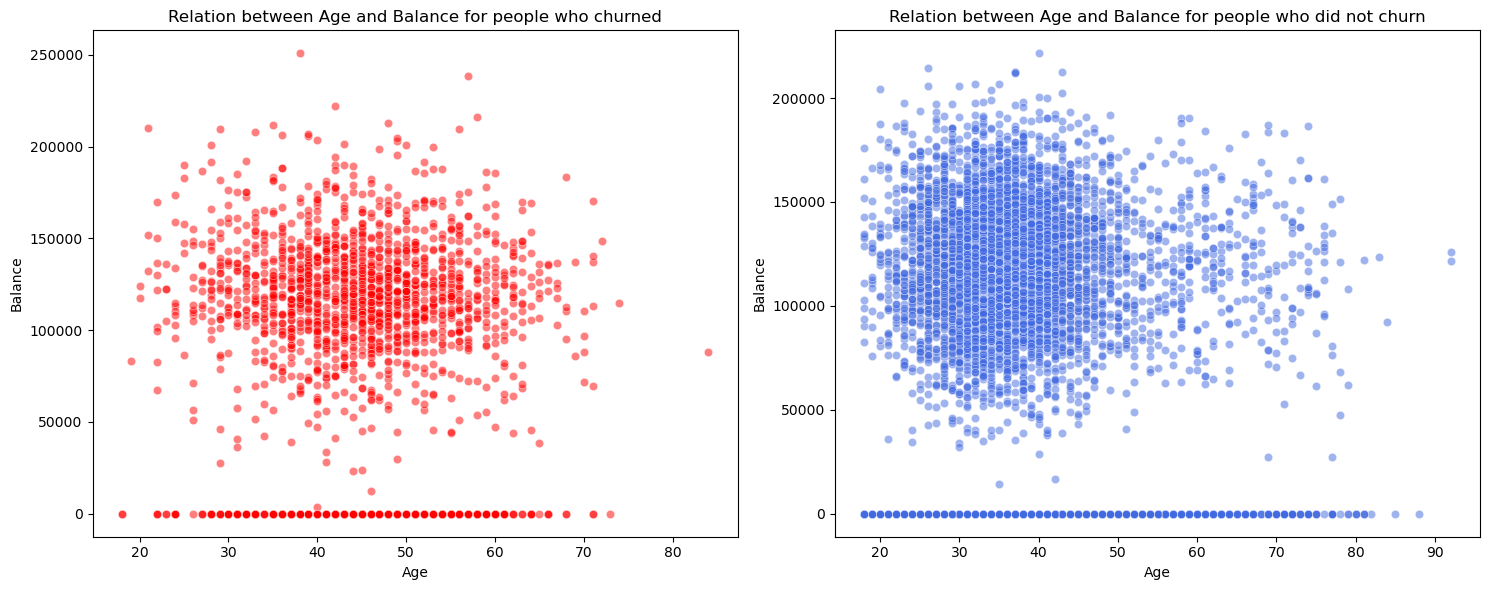

In [64]:
# Age и Balance клиентов, которые ушли из банка
churned_data = data[data['Exited'] == 1]
age_churned = churned_data['Age']
balance_churned = churned_data['Balance']

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Age', y='Balance', data=churned_data, color='red', alpha=0.5)
plt.title('Relation between Age and Balance for people who churned')
plt.xlabel('Age')
plt.ylabel('Balance')

# Age и Balance клиентов, которые остались в банке
unChurned_data = data[data['Exited'] == 0]
age_unChurned = unChurned_data['Age']
balance_unChurned = unChurned_data['Balance']

plt.subplot(1, 2, 2)
sns.scatterplot(x='Age', y='Balance', data=unChurned_data,color='royalblue', alpha=0.5)
plt.title('Relation between Age and Balance for people who did not churn')
plt.xlabel('Age')
plt.ylabel('Balance')

plt.tight_layout()
plt.show()

В банке в основном остается группа молодых людей (примерно 20-50 лет) с балансом около 60 000 - 170 0000 евро.  
Из банка в основном уходят клиенты из группы постарше (примерно 35-60 лет) с балансом немного поменьше около 70 000 - 150 000 евро.

Также посмотрим на взаимосвязь признаков `Age` и `EstimatedSalary` и целевого признака Exited:

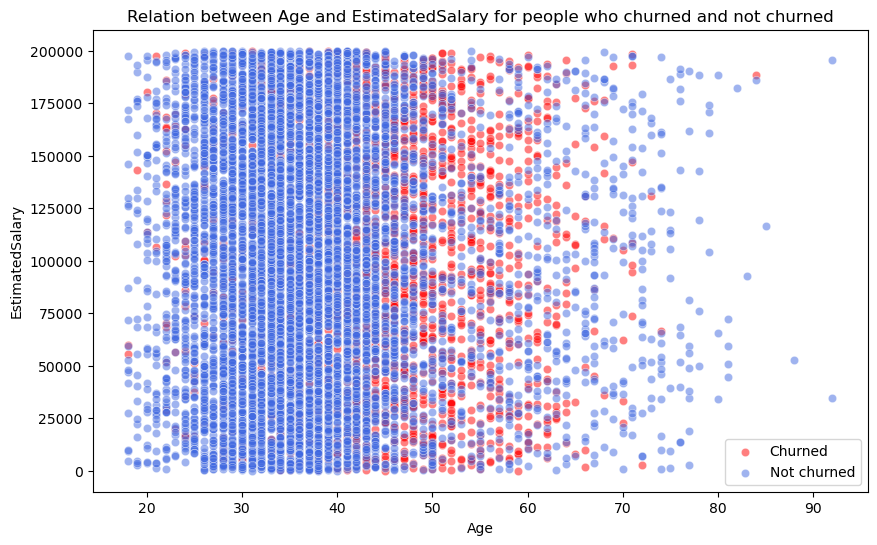

In [65]:
plt.figure(figsize=(10, 6))

churned_data = data[data['Exited'] == 1]
sns.scatterplot(x='Age', y='EstimatedSalary', data=churned_data, color='red', alpha=0.5, label='Churned')

unChurned_data = data[data['Exited'] == 0]
sns.scatterplot(x='Age', y='EstimatedSalary', data=unChurned_data, color='royalblue', alpha=0.5, label='Not churned')

plt.title('Relation between Age and EstimatedSalary for people who churned and not churned')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.legend()

plt.show()

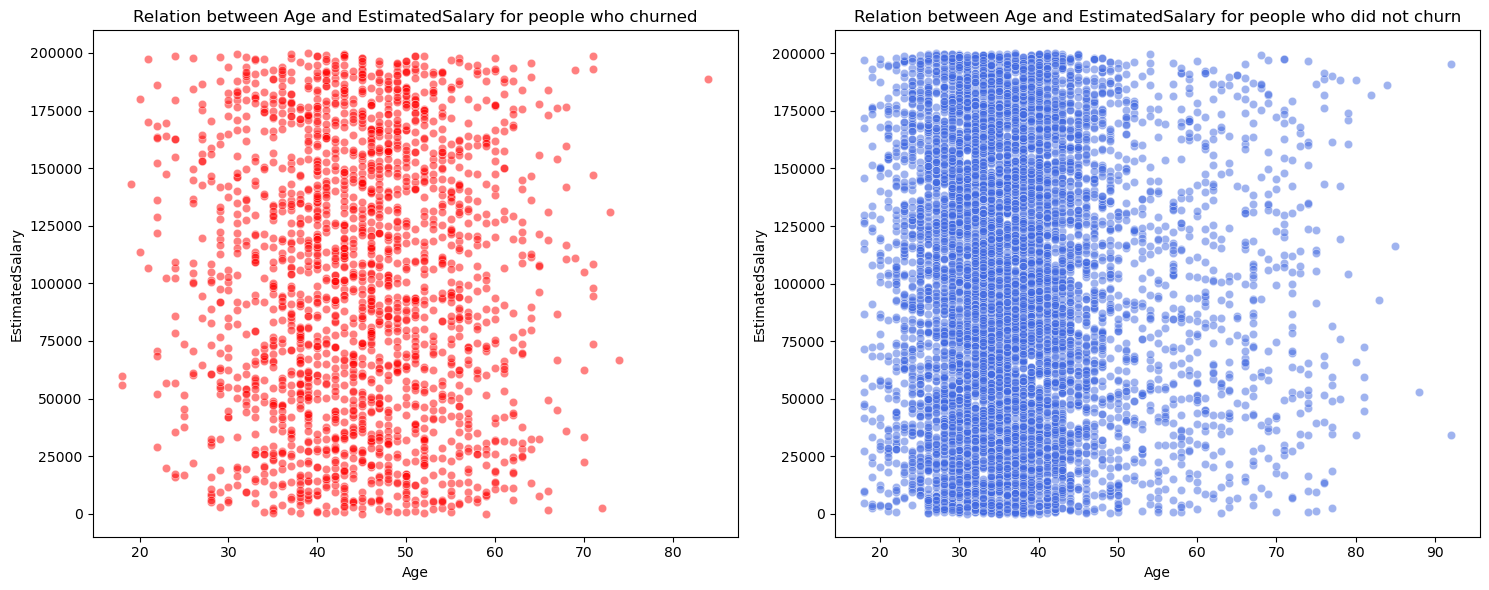

In [66]:
# Age и EstimatedSalary клиентов, которые ушли из банка
churned_data = data[data['Exited'] == 1]
age_churned = churned_data['Age']
balance_churned = churned_data['EstimatedSalary']

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x='Age', y='EstimatedSalary', data=churned_data, color='red', alpha=0.5)
plt.title('Relation between Age and EstimatedSalary for people who churned')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')

# Age и EstimatedSalary клиентов, которые остались в банке
unChurned_data = data[data['Exited'] == 0]
age_unChurned = unChurned_data['Age']
balance_unChurned = unChurned_data['EstimatedSalary']

plt.subplot(1, 2, 2)
sns.scatterplot(x='Age', y='EstimatedSalary', data=unChurned_data, color='royalblue', alpha=0.5)
plt.title('Relation between Age and EstimatedSalary for people who did not churn')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')

plt.tight_layout()
plt.show()

## Преобразование переменных

Создадим категориальный признак для количественной переменной `Age`: разделим клиентов на несколько возрастных категорий ("Молодые" (18 лет - 32 года), "Средний возраст" (32 года - 50 лет), "Пожилые" (более 50 лет)). Это может быть полезно, так как различные возрастные группы могут иметь разные паттерны поведения при принятии решения о том, уйти из банка или остаться.

In [67]:
def categorize_tenure(Age):
    if Age <= 32:
        return 'Young'
    elif Age > 32 and Age < 50:
        return 'Average age'
    else:
        return 'Old'

data['Age_Category'] = data['Age'].apply(categorize_tenure)
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Category
0,619,France,Female,42,2,0.00,1,1.0,1.0,101348.88,1,Average age
1,608,Spain,Female,41,1,83807.86,1,0.0,1.0,112542.58,0,Average age
2,502,France,Female,42,8,159660.80,3,1.0,0.0,113931.57,1,Average age
3,699,France,Female,39,1,0.00,2,0.0,0.0,93826.63,0,Average age
4,850,Spain,Female,43,2,125510.82,1,1.0,1.0,79084.10,0,Average age
...,...,...,...,...,...,...,...,...,...,...,...,...
9997,709,France,Female,36,7,0.00,1,0.0,1.0,42085.58,1,Average age
9998,772,Germany,Male,42,3,75075.31,2,1.0,0.0,92888.52,1,Average age
9999,772,Germany,Male,42,3,75075.31,2,1.0,0.0,92888.52,1,Average age
10000,792,France,Female,28,4,130142.79,1,1.0,0.0,38190.78,0,Young


# Создадим новые признаки
* `IsActive_by_CreditCard`: является ли клиент обладателем кредитной карты и активным членом одновременно (1 = да, 0 = нет).
* `Balance_to_Salary_Ratio`: отношение баланса счета клиента и его предполагаемой зарплаты.

In [68]:
data['IsActive_by_CreditCard'] = data['HasCrCard'] * data['IsActiveMember']

data['Balance_to_Salary_Ratio'] = data['Balance'] / data['EstimatedSalary']

Перекодируем категориальные переменные (`Geography`, `Gender`, `Tenure`, `NumOfProducts`, `Age_Category`):

In [69]:
data['Gender'] = data['Gender'].map({'Female': 0, 'Male': 1})
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Category,IsActive_by_CreditCard,Balance_to_Salary_Ratio
0,619,France,0,42,2,0.00,1,1.0,1.0,101348.88,1,Average age,1.0,0.000000
1,608,Spain,0,41,1,83807.86,1,0.0,1.0,112542.58,0,Average age,0.0,0.744677
2,502,France,0,42,8,159660.80,3,1.0,0.0,113931.57,1,Average age,0.0,1.401375
3,699,France,0,39,1,0.00,2,0.0,0.0,93826.63,0,Average age,0.0,0.000000
4,850,Spain,0,43,2,125510.82,1,1.0,1.0,79084.10,0,Average age,1.0,1.587055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,709,France,0,36,7,0.00,1,0.0,1.0,42085.58,1,Average age,0.0,0.000000
9998,772,Germany,1,42,3,75075.31,2,1.0,0.0,92888.52,1,Average age,0.0,0.808230
9999,772,Germany,1,42,3,75075.31,2,1.0,0.0,92888.52,1,Average age,0.0,0.808230
10000,792,France,0,28,4,130142.79,1,1.0,0.0,38190.78,0,Young,0.0,3.407702


In [70]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,CreditScore,Age,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,IsActive_by_CreditCard,Balance_to_Salary_Ratio,Geography_Germany,...,Tenure_6,Tenure_7,Tenure_8,Tenure_9,Tenure_10,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,Age_Category_Old,Age_Category_Young
0,619,42,0.00,1.0,1.0,101348.88,1,1.0,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
1,608,41,83807.86,0.0,1.0,112542.58,0,0.0,0.744677,0,...,0,0,0,0,0,0,0,0,0,0
2,502,42,159660.80,1.0,0.0,113931.57,1,0.0,1.401375,0,...,0,0,1,0,0,0,1,0,0,0
3,699,39,0.00,0.0,0.0,93826.63,0,0.0,0.000000,0,...,0,0,0,0,0,1,0,0,0,0
4,850,43,125510.82,1.0,1.0,79084.10,0,1.0,1.587055,0,...,0,0,0,0,0,0,0,0,0,0


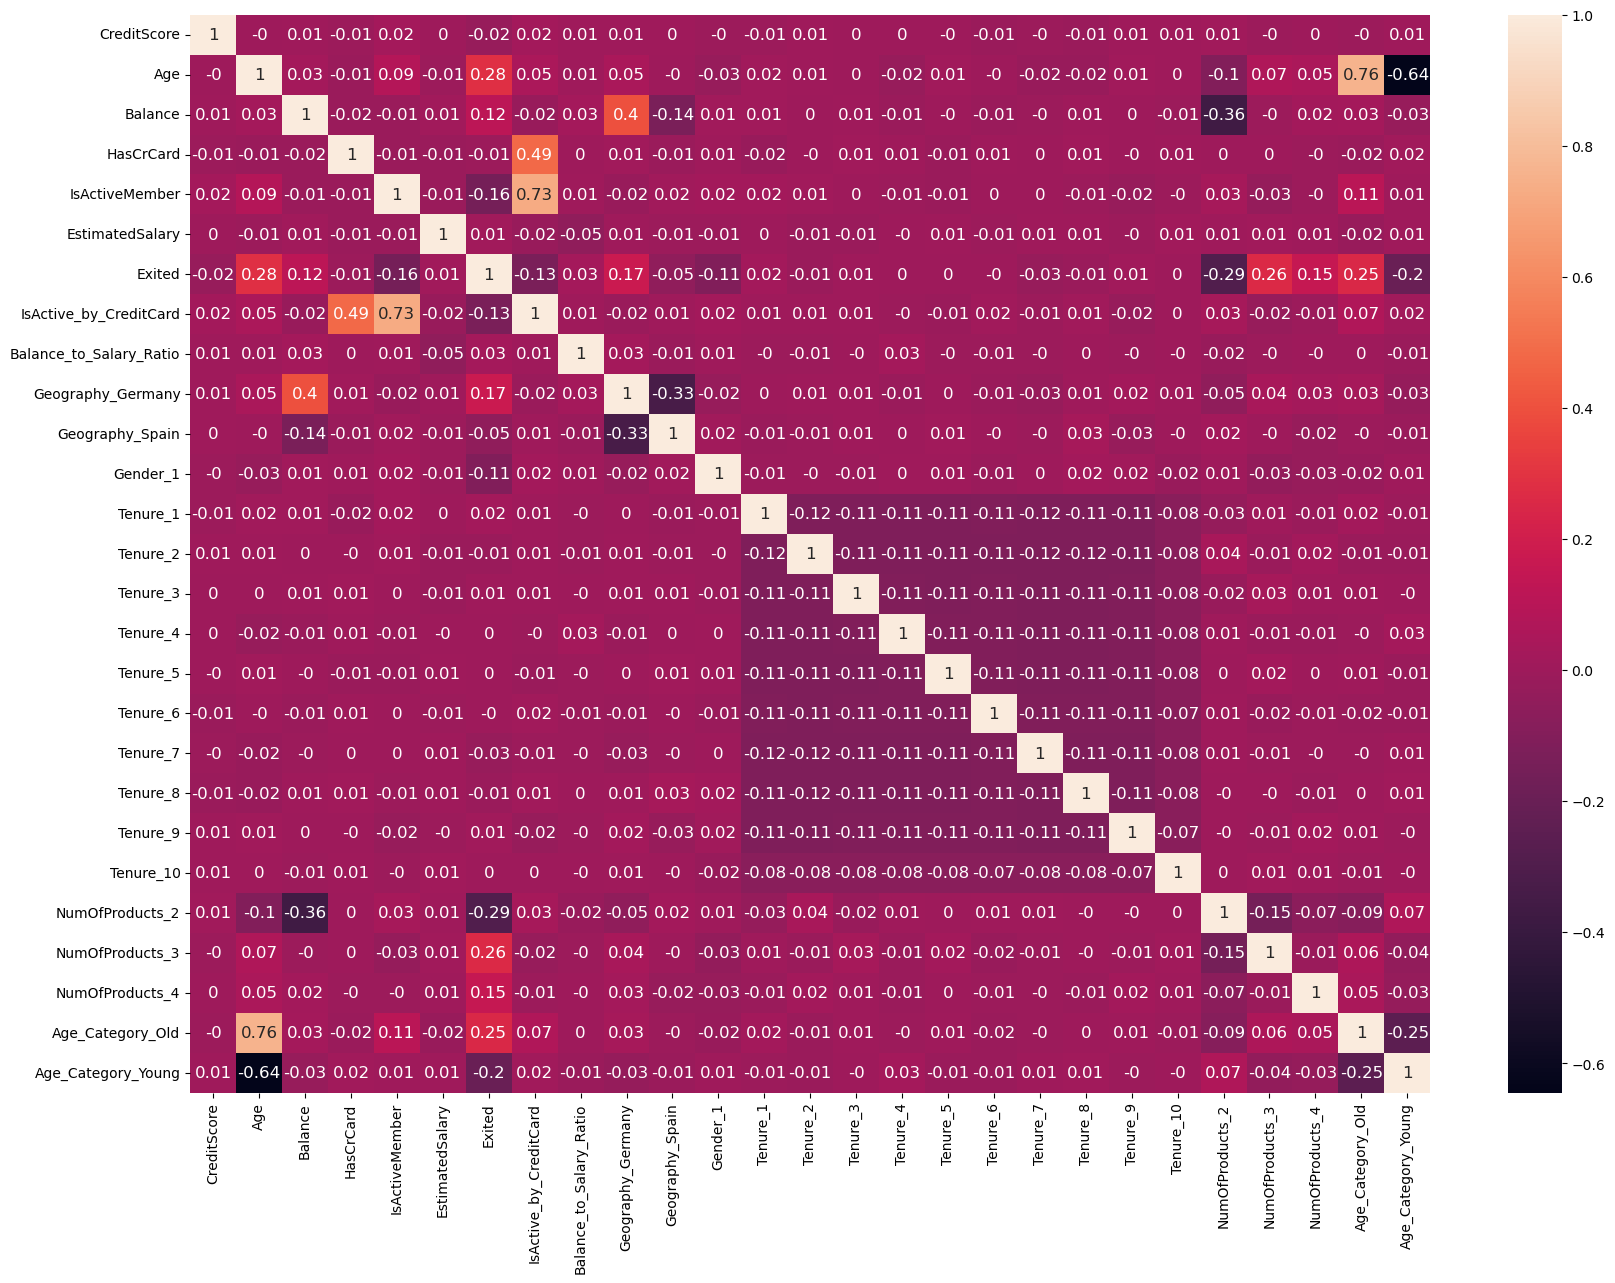

In [71]:
plt.figure(figsize=(20, 14))
sns.heatmap(data.corr(), annot=data.corr().round(2), annot_kws={"size": 12})
plt.show()

In [72]:
sorted_correlation = data.corr(numeric_only = True)['Exited'].abs().round(2).sort_values(ascending=False)
print(sorted_correlation.head(6)) 

Exited                1.00
NumOfProducts_2       0.29
Age                   0.28
NumOfProducts_3       0.26
Age_Category_Old      0.25
Age_Category_Young    0.20
Name: Exited, dtype: float64


## Гипотезы о влиянии переменных на независимую переменную

* __Гипотеза 1:__ Клиенты старшего возраста с более высокой вероятностью покинут банк. По результатам анализа видно, что с увеличением возраста клиенты более склонны покидать банк: большинство клиентов находятся в возрастной группе 30-40 лет, клиенты старше 50 лет чаще уходят из банка. Причиной такой связи может являться изменение финансовых потребностей с возрастом (клиенты старшего возраста могут оценивать соответствие услуг банка их новым потребностям и предпочтениям).
  
* __Гипотеза 2:__ Клиенты, которые являются менее активными членами банка более склонны покинуть банк. На это указывает отрицательная корреляция между переменными `IsActiveMember` и `Exited`. Причинами такой связи могут являться отсутствие персонализированного подхода, недостаток взаимодействия и обслуживания со стороны банка, что может привести к потере интереса со стороны клиента. 

* __Гипотеза 3:__ Клиенты с более высоким балансом на счете имеют более низкую вероятность ухода из банка. На это указывает положительная корреляция между переменными `Balance` и `Exited`. Причинами такой связи могут являться большая финансовая стабильность таких клиентов и нежелание рисковать при смене банка, нежелание менять банк из-за  дополнительных преимуществ и услуг, которые клиент получает благодаря своему большому балансу.

* __Гипотеза 4:__ Новые клиенты имеют более вероятность ухода из банка. Анализ показал, что среди клиентов, которые ушли из банка, больше тех, кто был членом банка менее одного года. Причинами такой связи могут являться разочарование новых клиентах в услугах, предоставляемых банком, несоотвествие ожиданий, более выгодные предложения других банков.

* __Гипотеза 5:__ Клиенты, использующие много продуктов, более склонны к уходу с банка. Анализ указывает на отток клиентов, которые пользуются 3 или 4 продуктами (их не так много, но почти все они выходят из банка). Причинами такой связи могут являться стоимость использования продуктов, сложность в управлении несколькими видами продуктов, изменение финансовых потребностей, переход в несколько других банков, специализированных на конкретном типе продукта.

# 3. Обучение и тестирование моделей 

### Отбор признаков
* Удалим из независимых переменных `Age_Category_Old` и `Age_Category_Young`, чтобы избежать возникновения мультиколлинеарности и переобучения модели (я обучила модели на признаках, включающих признак `Age`, и на признаках, включающих признаки `Age_Category_Old` и `Age_Category_Young`, первый вариант оказался лучше).   
* Модели, которые обучались без признаков `IsActive_by_CreditCard` и `Balance_to_Salary_Ratio` также оказались точнее, удалим и эти признаки.  
* После построения модели случайного леса стало понятно, что признак `Tenure` не является значимым для объяснения целевой переменной, удалим его.

Разобьем выборку на тренировочную и тестовую:

In [73]:
X = data.drop(['Exited', 'Age_Category_Old', 'Age_Category_Young', 'IsActive_by_CreditCard', 'Balance_to_Salary_Ratio', 
               'Tenure_1', 'Tenure_2', 'Tenure_3','Tenure_4', 'Tenure_5', 'Tenure_6', 'Tenure_7',
              'Tenure_8', 'Tenure_9', 'Tenure_10'], axis=1)
y = data['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=data['Exited'])

In [74]:
print("Размер обучающей выборки (X):", X_train.shape)
print("Размер обучающей выборки (y):", y_train.shape)
print("Размер тестовой выборки(X):", X_test.shape)
print("Размер тестовой выборки(y):", y_test.shape)

Размер обучающей выборки (X): (6995, 12)
Размер обучающей выборки (y): (6995,)
Размер тестовой выборки(X): (2999, 12)
Размер тестовой выборки(y): (2999,)


Применим оversampling для того, чтобы сбалансировать классы:

In [75]:
# Создание объекта RandomOverSampler
oversample = RandomOverSampler()

# Применение oversampling к тренировочным данным
X_train, y_train = oversample.fit_resample(X_train, y_train)

Примерним шкалирование для получения лучшего качества моделей:

In [76]:
robust_scaler = RobustScaler()
robust_scaler.fit(X_train)

X_train_scaled = robust_scaler.transform(X_train)
X_test_scaled = robust_scaler.transform(X_test)

## Выбор метрики измерения качества модели 
Учитывая несбалансированность классов целевой переменной в качестве метрики измерения качества модели лучше выбрать f-score, precision или recall. F-score учитывает как precision, так и recall. Высокий F-score означает, что модель хорошо классифицирует оба класса. На значение метрики f-score мы и будем обращать внимание при дальнейшем анализе. 

## Построим baseline модель

In [77]:
# Создаем наивную модель, предсказывающую класс 0
naive_prediction = np.zeros(X_test.shape[0])

# Оценим качество модели
accuracy = accuracy_score(y_test, naive_prediction)
print("Accuracy наивной модели:", accuracy)

f1 = f1_score(y_test, naive_prediction)
print("F1-score наивной модели:", f1)

precision = precision_score(y_test, naive_prediction)
print("Precision наивной модели:", precision)

recall = recall_score(y_test, naive_prediction)
print("Recall наивной модели:", recall)

Accuracy наивной модели: 0.7969323107702567
F1-score наивной модели: 0.0
Precision наивной модели: 0.0
Recall наивной модели: 0.0


## Проверим модели при характеристиках по умолчанию

### Логистическая регрессия

In [78]:
# Создаем объект класса логистическая регрессия с характеристиками по умолчанию
log_reg = linear_model.LogisticRegression()

# Обучаем модель, минимизируя logloss
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [79]:
# Делаем предсказание для тестовой выборки
y_test_pred = log_reg.predict(X_test_scaled)
# Вывод отчета о метриках классификации
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84      2390
           1       0.46      0.75      0.57       609

    accuracy                           0.77      2999
   macro avg       0.69      0.76      0.70      2999
weighted avg       0.83      0.77      0.78      2999



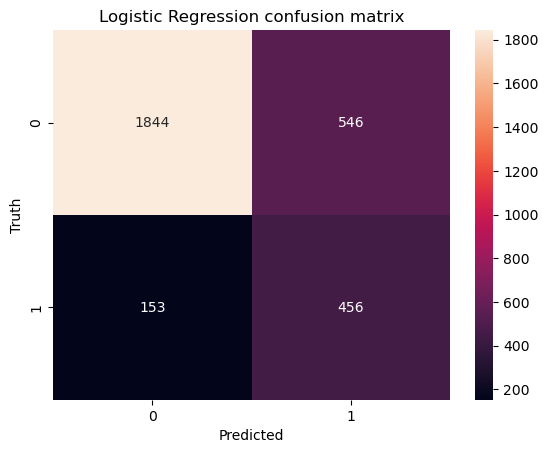

In [80]:
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("Logistic Regression confusion matrix")
plt.show()

### Случайный лес

In [81]:
#Создаем объект класса случайный лес
rf = ensemble.RandomForestClassifier()
#Обучаем модель
rf.fit(X_train, y_train)
#Выводим значения метрики 
y_train_pred = rf.predict(X_train)
print('Train: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
y_test_pred = rf.predict(X_test)
print('Test: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

Train: 1.00
Test: 0.60


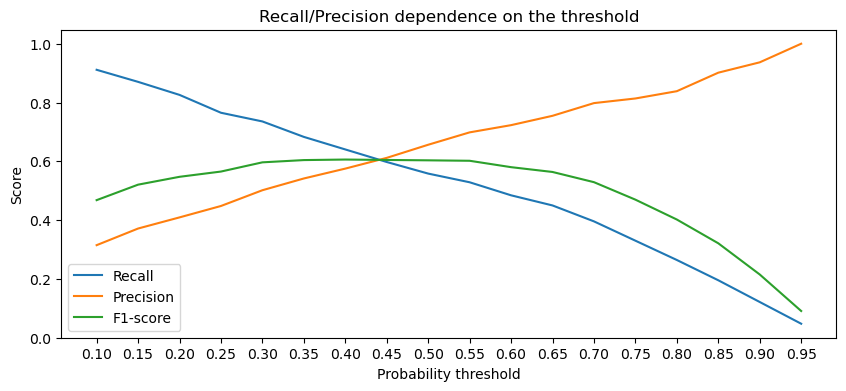

In [82]:
#Нас интересует только вероятность класса (второй столбец)
y_test_proba_pred = rf.predict_proba(X_test)[:, 1]
#Для удобства завернем numpy-массив в pandas Series
y_test_proba_pred = pd.Series(y_test_proba_pred)
#Создадим списки, в которых будем хранить значения метрик 
recall_scores = []
precision_scores = []
f1_scores = []
#Сгенерируем набор вероятностных порогов в диапазоне от 0.1 до 1
thresholds = np.arange(0.1, 1, 0.05)
#В цикле будем перебирать сгенерированные пороги
for threshold in thresholds:
    #В противном случае - к классу 0
    y_test_pred = y_test_proba_pred.apply(lambda x: 1 if x>threshold else 0)
    #Считаем метрики и добавляем их в списки
    recall_scores.append(metrics.recall_score(y_test, y_test_pred))
    precision_scores.append(metrics.precision_score(y_test, y_test_pred))
    f1_scores.append(metrics.f1_score(y_test, y_test_pred))

#Визуализируем метрики при различных threshold
fig, ax = plt.subplots(figsize=(10, 4)) #фигура + координатная плоскость
#Строим линейный график зависимости recall от threshold
ax.plot(thresholds, recall_scores, label='Recall')
#Строим линейный график зависимости precision от threshold
ax.plot(thresholds, precision_scores, label='Precision')

#Строим линейный график зависимости F1 от threshold
ax.plot(thresholds, f1_scores, label='F1-score')
#Даем графику название и подписи осям
ax.set_title('Recall/Precision dependence on the threshold')
ax.set_xlabel('Probability threshold')
ax.set_ylabel('Score')
ax.set_xticks(thresholds)
ax.legend();

In [83]:
#Задаем оптимальный порог вероятностей
threshold_opt = 0.45
y_test_pred_opt = y_test_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)
#Считаем метрики
print(metrics.classification_report(y_test, y_test_pred_opt))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      2390
           1       0.61      0.60      0.60       609

    accuracy                           0.84      2999
   macro avg       0.75      0.75      0.75      2999
weighted avg       0.84      0.84      0.84      2999



### KNN

In [84]:
knn = KNeighborsClassifier()

# обучаем его по тренировочные выборке - просто забрал точки и запомнил их координаты
knn.fit(X_train_scaled, y_train)

# строим для тестовой выборки прогнозы - здесь уже начинает считать расстояния
y_pred_knn = knn.predict(X_test_scaled)

# прогнозы вероятностей
p_pred_knn = knn.predict_proba(X_test_scaled) 

In [85]:
#Считаем метрики
print(metrics.classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      2390
           1       0.40      0.68      0.50       609

    accuracy                           0.73      2999
   macro avg       0.65      0.71      0.66      2999
weighted avg       0.80      0.73      0.75      2999



###  Сравнение моделей

У модели ___логистической регрессии___ при характеристиках по умолчанию f1-score для 1 на тестовом наборе = 0.57, у модели ___случайного леса___ при характеристиках по умолчанию f1-score на тестовом наборе для 1 = 0.60, у модели ___KNN___ при характеристиках по умолчанию f1-score для 1 на тестовом наборе = 0.50.

Таким образом, при характеристиках по умолчанию лучше всего с предсказанием справилась модель ___случайного леса___, у которой метрика f1-score на тестовом наборе для 1 = 0.60.

## Обучим модели и проверим метрикой качества

### Логистическая регрессия

In [86]:
#Создаем объект класса логистическая регрессия
log_reg = linear_model.LogisticRegression(
    solver='sag', #алгоритм оптимизации
    random_state=1, #генератор случайных чисел
    max_iter=1000, #количество итераций на сходимость
)
#Обучаем модель, минимизируя logloss
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=1, solver='sag')

In [87]:
#Делаем предсказание для тестовой выборки
y_test_pred = log_reg.predict(X_test_scaled)
#Вывод отчет о метриках классификации
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84      2390
           1       0.46      0.75      0.57       609

    accuracy                           0.77      2999
   macro avg       0.69      0.76      0.70      2999
weighted avg       0.83      0.77      0.78      2999



Добавим регуляризацию:

In [88]:
#Создаем объект класса логистическая регрессия с L1 регуляризацией
log_reg_l1 = linear_model.LogisticRegression(
    solver='saga', #алгоритм оптимизации для L1 регуляризации
    random_state=1, #генератор случайных чисел
    max_iter=1000, #количество итераций на сходимость
    penalty='l1', #используем L1 регуляризацию
    C=1.0, #параметр регуляризации
)

#Обучаем модель с L1 регуляризацией, минимизируя logloss
log_reg_l1.fit(X_train_scaled, y_train)

#Делаем предсказание для тестовой выборки с использованием модели с L1 регуляризацией
y_test_pred_l1 = log_reg_l1.predict(X_test_scaled)

#Вывод отчет о метриках классификации для модели с L1 регуляризацией
print("Classification report for L1 regularized logistic regression:")
print(metrics.classification_report(y_test, y_test_pred_l1))

Classification report for L1 regularized logistic regression:
              precision    recall  f1-score   support

           0       0.92      0.77      0.84      2390
           1       0.46      0.75      0.57       609

    accuracy                           0.77      2999
   macro avg       0.69      0.76      0.70      2999
weighted avg       0.83      0.77      0.79      2999



Посмотрим какие признаки оказались важнее:

            Feature  Coefficient  Absolute Coefficient
11  NumOfProducts_4     3.428311              3.428311
10  NumOfProducts_3     2.486283              2.486283
9   NumOfProducts_2    -1.459537              1.459537


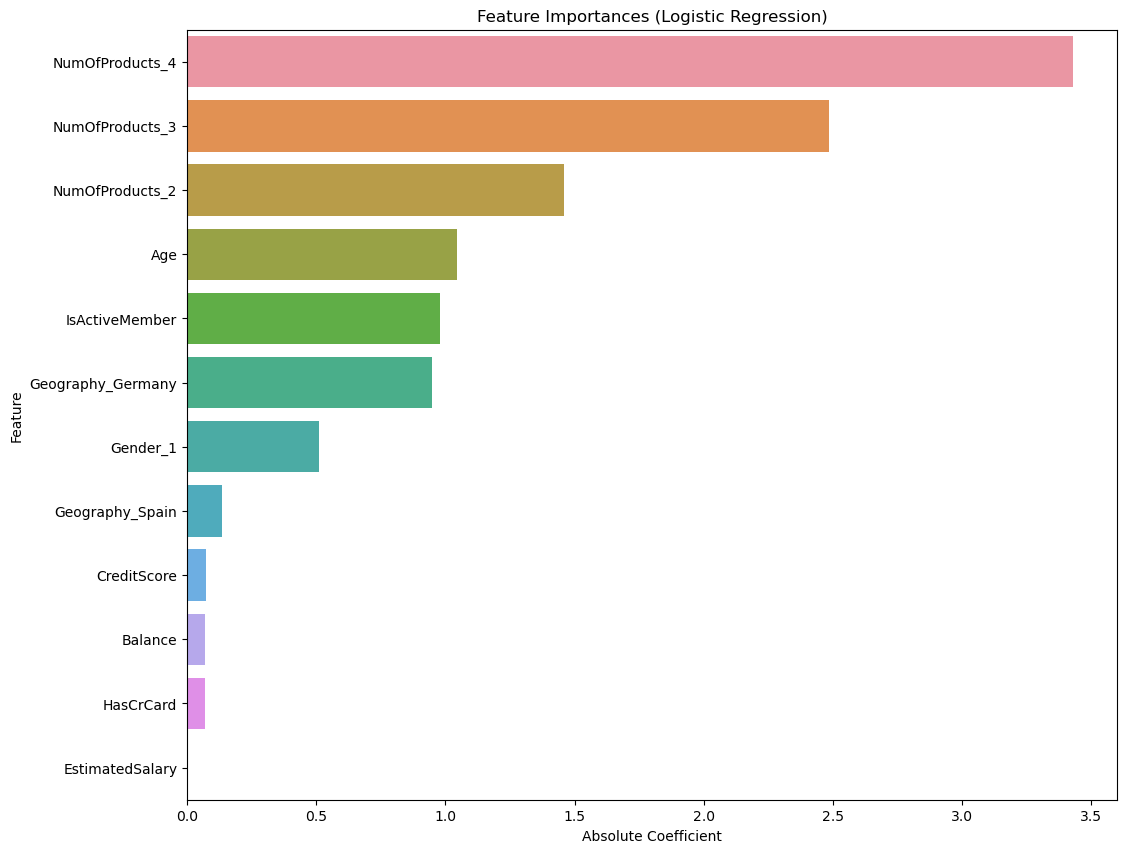

In [89]:
coefficients = log_reg.coef_[0]
feature_names = X_train.columns

importances_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
importances_df['Absolute Coefficient'] = np.abs(importances_df['Coefficient'])

importances_df = importances_df.sort_values('Absolute Coefficient', ascending=False)

top3_features = importances_df.head(3)
print(top3_features)

plt.figure(figsize=(12, 10))
sns.barplot(x='Absolute Coefficient', y='Feature', data=importances_df)
plt.title('Feature Importances (Logistic Regression)')
plt.show()

### Случайный лес

In [90]:
#Создаем объект класса случайный лес
rf = ensemble.RandomForestClassifier(
    n_estimators=500,
    max_depth=15,
    criterion='entropy',
    min_samples_leaf=10,
    random_state=42,
)
#Обучаем модель
rf.fit(X_train, y_train)
#Выводим значения метрики 
y_train_pred = rf.predict(X_train)
print('Train: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
y_test_pred = rf.predict(X_test)
print('Test: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

Train: 0.90
Test: 0.62


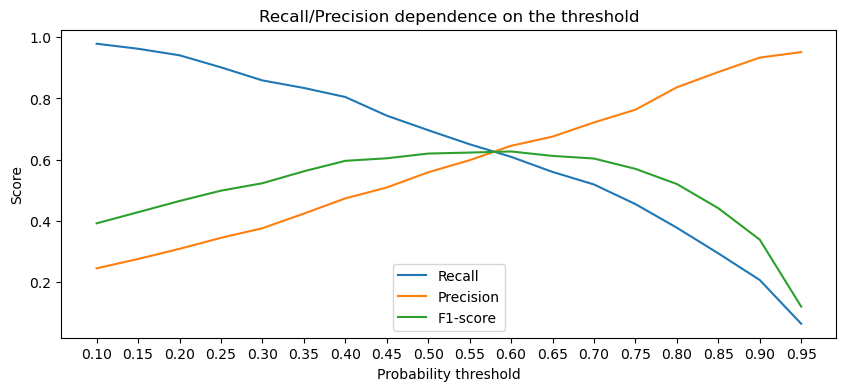

In [91]:
#Нас интересует только вероятность класса (второй столбец)
y_test_proba_pred = rf.predict_proba(X_test)[:, 1]
#Для удобства завернем numpy-массив в pandas Series
y_test_proba_pred = pd.Series(y_test_proba_pred)
#Создадим списки, в которых будем хранить значения метрик 
recall_scores = []
precision_scores = []
f1_scores = []
#Сгенерируем набор вероятностных порогов в диапазоне от 0.1 до 1
thresholds = np.arange(0.1, 1, 0.05)
#В цикле будем перебирать сгенерированные пороги
for threshold in thresholds:
    #В противном случае - к классу 0
    y_test_pred = y_test_proba_pred.apply(lambda x: 1 if x>threshold else 0)
    #Считаем метрики и добавляем их в списки
    recall_scores.append(metrics.recall_score(y_test, y_test_pred))
    precision_scores.append(metrics.precision_score(y_test, y_test_pred))
    f1_scores.append(metrics.f1_score(y_test, y_test_pred))

#Визуализируем метрики при различных threshold
fig, ax = plt.subplots(figsize=(10, 4)) #фигура + координатная плоскость
#Строим линейный график зависимости recall от threshold
ax.plot(thresholds, recall_scores, label='Recall')
#Строим линейный график зависимости precision от threshold
ax.plot(thresholds, precision_scores, label='Precision')

#Строим линейный график зависимости F1 от threshold
ax.plot(thresholds, f1_scores, label='F1-score')
#Даем графику название и подписи осям
ax.set_title('Recall/Precision dependence on the threshold')
ax.set_xlabel('Probability threshold')
ax.set_ylabel('Score')
ax.set_xticks(thresholds)
ax.legend();

In [92]:
#Задаем оптимальный порог вероятностей
threshold_opt = 0.58
y_test_pred_opt = y_test_proba_pred.apply(lambda x: 1 if x > threshold_opt else 0)
#Считаем метрики
print(metrics.classification_report(y_test, y_test_pred_opt))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2390
           1       0.63      0.63      0.63       609

    accuracy                           0.85      2999
   macro avg       0.77      0.77      0.77      2999
weighted avg       0.85      0.85      0.85      2999



Посмотрим какие признаки оказались важнее:

           Feature  Importance
1              Age    0.311255
9  NumOfProducts_2    0.151815
2          Balance    0.134686
0      CreditScore    0.100160
5  EstimatedSalary    0.097953


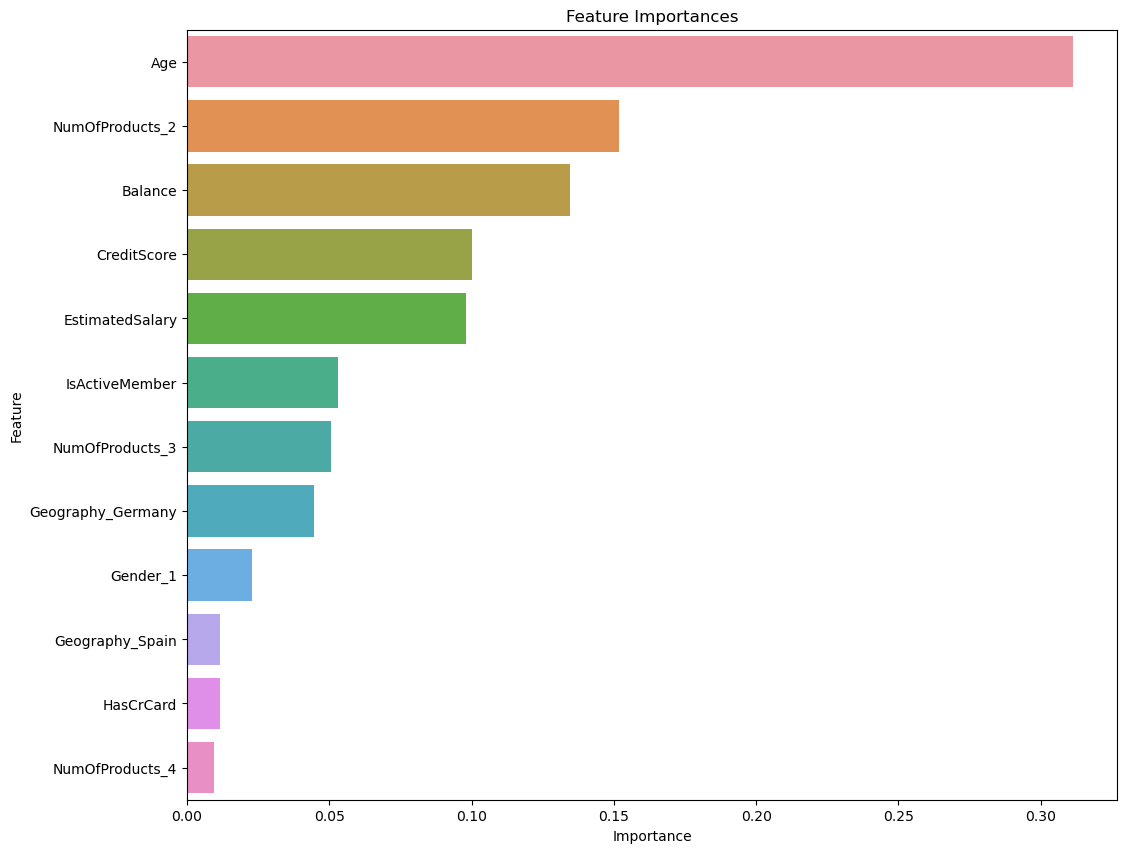

In [93]:
feature_importances = rf.feature_importances_  # rf - наша обученная модель 
feature_names = X_train.columns  # X_train содержит наши факторы

importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importances_df = importances_df.sort_values('Importance', ascending=False) # поставим значимость по убыванию

top5_features = importances_df.head(5)
print(top5_features)

plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Feature Importances')
plt.show()

### KNN

In [94]:
# объявляем метод 9 ближайших соседей
knn = KNeighborsClassifier(n_neighbors = 9)

# обучаем его по тренировочные выборке 
knn.fit(X_train_scaled, y_train)

# строим для тестовой выборки прогнозы 
y_pred_knn = knn.predict(X_test_scaled)

# прогнозы вероятностей
p_pred_knn = knn.predict_proba(X_test_scaled) 

In [95]:
#Считаем метрики
print(metrics.classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      2390
           1       0.41      0.69      0.52       609

    accuracy                           0.74      2999
   macro avg       0.66      0.72      0.67      2999
weighted avg       0.80      0.74      0.76      2999



###  Сравнение моделей

У модели ___логистической регрессии___ f1-score для 1 на тестовом наборе = 0.57 (значение совпадает с моделью логистической регрессии с характеристиками по умолчанию), у модели ___случайного леса___ f1-score на тестовом наборе для 1 = 0.63 (на 0.03 больше по сравнению с моделью случайного леса с характеристиками по умолчанию), у модели ___KNN___ f1-score для 1 на тестовом наборе = 0.52 (на 0.01 больше по сравнению с моделью KNN с характеристиками по умолчанию).  

Таким образом, лучше всего с предсказанием справилась модель ___случайного леса___, у которой метрика f1-score на тестовом наборе для 1 = 0.63. Попробуем улучшить качество наших моделей - сделаем перебор параметров.

## Перебор параметров в моделях

Осуществим оптимизацию гиперпараметров для алгоритмов __логистической регрессии__ с использованием класса RandomizedSearchCV: 
__Описание параметров:__

* `penalty`: отвечает за тип регуляризации, который будет применен в модели логистической регрессии (L2-регуляризация или без регуляризации).
* `solver`: отвечает за алгоритм оптимизации, который будет использоваться для обучения модели логистической регрессии.
* `C`: отвечает за силу регуляризации в модели логистической регрессии.

In [96]:
#np.linspace(start(от), stop(до), num=50(количество),dtype- тип данных)
param_distributions = {'penalty': ['l2', 'None'],
              'solver': ['lbfgs', 'sag'],
               'C': list(np.linspace(0.01, 1, 10, dtype=float))}
            
random_search = RandomizedSearchCV(
    estimator=linear_model.LogisticRegression(random_state=42, max_iter=1000), 
    param_distributions=param_distributions, 
    cv=5, 
    n_iter = 20, # задаем количество комбинаций
    n_jobs = -1
)  
%time random_search.fit(X_train_scaled, y_train) 
print("accuracy на тестовом наборе: {:.2f}".format(random_search.score(X_test_scaled, y_test)))
y_test_pred = random_search.predict(X_test_scaled)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(random_search.best_params_))

CPU times: user 207 ms, sys: 143 ms, total: 350 ms
Wall time: 4.01 s
accuracy на тестовом наборе: 0.77
f1_score на тестовом наборе: 0.57
Наилучшие значения гиперпараметров: {'solver': 'sag', 'penalty': 'l2', 'C': 0.78}


Осуществим оптимизацию гиперпараметров для алгоритмов __случайного леса__ с использованием класса RandomizedSearchCV:
#### Описание параметров:
* `n_estimators`:  количество деревьев. Увеличение количества деревьев может улучшить качество модели, однако также может привести к переобучению.

* `min_samples_split`: минимальное количество образцов, необходимое для разделения внутреннего узла дерева. Увеличение этого признака может привести к более общим разбиениям в дереве и уменьшить склонность модели к переобучению.

* `max_depth`: максимальная глубина каждого дерева. Определяет, насколько глубоко может "узнать" каждое дерево внутреннюю структуру данных. Увеличение глубины деревьев может улучшить качество модели, однако также может привести к переобучению.

In [97]:
param_distributions = {'n_estimators': list(range(80, 200, 30)), 
              'min_samples_leaf': [5],
              'max_depth': list(np.linspace(20, 40, 10, dtype=int))
              }
            
    
random_search_forest = RandomizedSearchCV(
    estimator=ensemble.RandomForestClassifier(random_state=42), 
    param_distributions=param_distributions, 
    cv=5,
    n_iter = 10, 
    n_jobs = -1
)  
%time random_search_forest.fit(X_train_scaled, y_train) 
y_train_pred = random_search_forest.predict(X_train_scaled)
print('f1_score на обучающем наборе: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
print("accuracy на тестовом наборе: {:.2f}".format(random_search_forest.score(X_test_scaled, y_test)))
y_test_pred = random_search_forest.predict(X_test_scaled)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(random_search_forest.best_params_))

CPU times: user 1.75 s, sys: 254 ms, total: 2.01 s
Wall time: 19.4 s
f1_score на обучающем наборе: 0.95
accuracy на тестовом наборе: 0.83
f1_score на тестовом наборе: 0.61
Наилучшие значения гиперпараметров: {'n_estimators': 140, 'min_samples_leaf': 5, 'max_depth': 22}


Осуществим оптимизацию гиперпараметров для __KNN__ с использованием класса RandomizedSearchCV:
#### Описание параметров:
* `n_neighbors`:  количество  соседей. 

* `weights`: веса для соседей. 

* `metric`: метрика расстояния.

In [98]:
# Определение параметров для перебора
param_distributions = {
    'n_neighbors': range(1, 13),           
    'weights': ['uniform', 'distance'],   
    'metric': ['euclidean', 'manhattan']   
}

# Создание объекта RandomizedSearchCV 
random_search_knn = RandomizedSearchCV(
    estimator=KNeighborsClassifier(), 
    param_distributions=param_distributions, 
    cv=5, 
    n_iter=10,
    n_jobs=-1
)

# Обучение модели и подбор гиперпараметров
random_search_knn.fit(X_train_scaled, y_train)

# Вывод метрик и лучших параметров
print('f1_score на обучающем наборе: {:.2f}'.format(random_search_knn.score(X_train_scaled, y_train)))
print("accuracy на тестовом наборе: {:.2f}".format(random_search_knn.score(X_test_scaled, y_test)))
y_test_pred = random_search_knn.predict(X_test_scaled)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(random_search_knn.best_params_))

f1_score на обучающем наборе: 1.00
accuracy на тестовом наборе: 0.75
f1_score на тестовом наборе: 0.53
Наилучшие значения гиперпараметров: {'weights': 'distance', 'n_neighbors': 11, 'metric': 'manhattan'}


### Сравнение моделей
У модели ___логистической регрессии___ f1-score для 1 на тестовом наборе = 0.57(совпадает с моделью логистической регрессии), у модели ___случайного леса___ f1-score на тестовом наборе для 1 = 0.61 (на 0.01 меньше по сравнению с моделью случайного леса), у модели ___KNN___ f1-score для 1 на тестовом наборе = 0.53 (на 0.01 больше по сравнению с моделью KNN).  

Таким образом, качество моделей улучшить не удалось. Попробуем добиться лучшего результата при помощи ансамблевых методов.

### Градиентный бустинг  
#### Описание параметров:
* `n_estimators`:  количество деревьев. Увеличение количества деревьев может улучшить качество модели, однако также может привести к переобучению.

* `learning_rate`: темп обучения. Чем выше темп обучения, тем быстрее сойдем к минимуму функции, но высок риск переобучения (рекомендуемые значения от 0.01 до 1))

* `max_depth`: максимальная глубина каждого дерева. Определяет, насколько глубоко может "узнать" каждое дерево внутреннюю структуру данных. Увеличение глубины деревьев может улучшить качество модели, однако также может привести к переобучению.

* `min_samples_split`: минимальное количество образцов, необходимое для разделения внутреннего узла дерева. Увеличение этого признака может привести к более общим разбиениям в дереве и уменьшить склонность модели к переобучению.

In [99]:
model_for_gs = GradientBoostingClassifier()
params = {"n_estimators": 2**np.arange(4), "learning_rate": 0.1**np.arange(2), 
          "max_depth": [3, 4, 5, 7, 9],  "min_samples_split": [2, 3, 5, 10]}

gs = GridSearchCV(model_for_gs, 
                  params, 
                  cv=5, 
                  scoring=make_scorer(f1_score),
                  verbose=5)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV 1/5] END learning_rate=1.0, max_depth=3, min_samples_split=2, n_estimators=1;, score=0.723 total time=   0.0s
[CV 2/5] END learning_rate=1.0, max_depth=3, min_samples_split=2, n_estimators=1;, score=0.702 total time=   0.0s
[CV 3/5] END learning_rate=1.0, max_depth=3, min_samples_split=2, n_estimators=1;, score=0.726 total time=   0.0s
[CV 4/5] END learning_rate=1.0, max_depth=3, min_samples_split=2, n_estimators=1;, score=0.705 total time=   0.0s
[CV 5/5] END learning_rate=1.0, max_depth=3, min_samples_split=2, n_estimators=1;, score=0.711 total time=   0.0s
[CV 1/5] END learning_rate=1.0, max_depth=3, min_samples_split=2, n_estimators=2;, score=0.775 total time=   0.0s
[CV 2/5] END learning_rate=1.0, max_depth=3, min_samples_split=2, n_estimators=2;, score=0.748 total time=   0.0s
[CV 3/5] END learning_rate=1.0, max_depth=3, min_samples_split=2, n_estimators=2;, score=0.769 total time=   0.0s
[CV 4/5] END learning_rat

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': array([1. , 0.1]),
                         'max_depth': [3, 4, 5, 7, 9],
                         'min_samples_split': [2, 3, 5, 10],
                         'n_estimators': array([1, 2, 4, 8])},
             scoring=make_scorer(f1_score), verbose=5)

In [100]:
print("Лучшие гиперпараметры:", gs.best_params_)
y_pred = gs.best_estimator_.predict(X_test)
f1_score = metrics.f1_score(y_test, y_pred)
print("Лучшее значение метрики f1-score:", f1_score)

Лучшие гиперпараметры: {'learning_rate': 1.0, 'max_depth': 9, 'min_samples_split': 3, 'n_estimators': 8}
Лучшее значение метрики f1-score: 0.5338582677165354


### XGBClassifier

In [101]:
# Определение модели
model = xgb.XGBClassifier(random_state=42, n_jobs=-1)
parameters = {'learning_rate': [0.05, 0.1, 0.2], 'max_depth': [3, 4, 5],
              'n_estimators': [100, 200, 300],'subsample': [0.6, 0.8, 1.0]}

# Создание объекта GridSearchCV
clf = GridSearchCV(model, parameters, cv=3)

# обучение модели
clf.fit(X_train, y_train)

# предсказание на тестовом наборе данных
preds_test = clf.predict(X_test)

In [104]:
from sklearn.metrics import f1_score
f1_score_result = f1_score(y_test, preds_test)
print("F1_score на тестовом наборе данных:", f1_score_result)

F1_score на тестовом наборе данных: 0.5714285714285714


При помощи моделей градиентного бустинга и модели XGBClassifier улучшить качество модели не удалось: значение метрики f1-score низкое, примерно 0.54 и 0.57 соответственно.

Таким образом, лучший результат показала модель случайного леса, у которой метрика f1-score на тестовом наборе для 1 = 0.63.   

Наиболее важными признаками для объяснения выхода клиентов из банка оказались их возраст, количество продуктов, которым пользуется клиент, баланс, кредитный рейтинг клиента и его предполагаемая зарплата.